![](https://www.finplus.co.in/wp-content/uploads/2017/10/Top-Categories-In-Online-Retail-In-India.jpg)

## Contexto
<a href="https://drive.google.com/file/d/1T1YHmTUcnOgVfTLnQRtNrzLIgazr2N4S/view?usp=sharing">Online retail es un dataset transaccional</a> que contiene todas las transacciones que ocurrieron entre el 1/12/2010 y el 9/12/2011 en el e-commerce de UK. La compañía vende principalmente regalos y sus clientes tienden a ser revendedores que compran al por mayor.

## Documentación
https://archive.ics.uci.edu/dataset/352/online+retail

## Objetivo de Negocio
"Buscamos segmentar a nuestros clientes para entender sus características y patrones de compra para así poder ofrecerles una mejor experiencia."

**En base a los clusteres creados, expliquenos las características de cada tipo de cliente y qué productos podríamos ofrecerles.**



## Consigna
1. Hacer un breve análisis descriptivo del dataset
2. Al ser un dataset transaccional, hacer todas las modificaciones necesarias para poder utilizarlo (agrupaciones, agregar columnas, etc).
3. Probar los modelos que conocen para dividir en clusters, elegir el que mejor resultado les de.
4. En base a los clusteres creados, expliquen las características de cada tipo de cliente y qué productos se podría ofrecerles.

---

<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTACIÓN DE LIBRERÍAS</p>

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import time
import umap.umap_ as umap
from scipy.stats import zscore
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib.colors import ListedColormap
from sklearn import metrics
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from collections import Counter
import warnings
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.manifold import TSNE
from sklearn.manifold import trustworthiness
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">CARGA DE DATOS</p>

In [2]:
df_retail = pd.read_excel('/Users/lolonastri/Desktop/IA_UCEMA/trabajos_practicos/tp4_onlineretail/data/Online Retail.xlsx', sheet_name='Online Retail')
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">COMPRENSIÓN DE LOS DATOS</p>

### → Validación de la data

In [3]:
print("El dataset tiene" , df_retail.shape[0], "filas y", df_retail.shape[1], "columnas")

El dataset tiene 541909 filas y 8 columnas


In [4]:
df_retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
from funciones.funciones import validate_columns
validate_columns(df_retail)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
InvoiceNo,25900.0,541909.0,0,0.000000,"[555200, 554974, 550972, 576652, 546157]"
StockCode,4070,541909,0,0.000000,"[71459, 21128, 21086, 22812, 22180]"
Description,4223,540455,1454,0.268311,"[HANGING JAM JAR T-LIGHT HOLDER, GOLD FISHING ..."
Quantity,NaN,541909.0,0,0.000000,"[24, 4, 4, 3, 2]"
InvoiceDate,NaN,541909,0,0.000000,"[2011-06-01 12:05:00, 2011-05-27 17:14:00, 201..."
UnitPrice,NaN,541909.0,0,0.000000,"[0.85, 6.95, 0.65, 1.95, 9.95]"
CustomerID,NaN,406829.0,135080,24.926694,"[17315.0, 14031.0, 14031.0, 17198.0, 13502.0]"
Country,38,541909,0,0.000000,"[United Kingdom, United Kingdom, United Kingdo..."


In [6]:
df_retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


### →  Veo los tipos de datos con dtypes

In [7]:
df_retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

### → Valores outliers

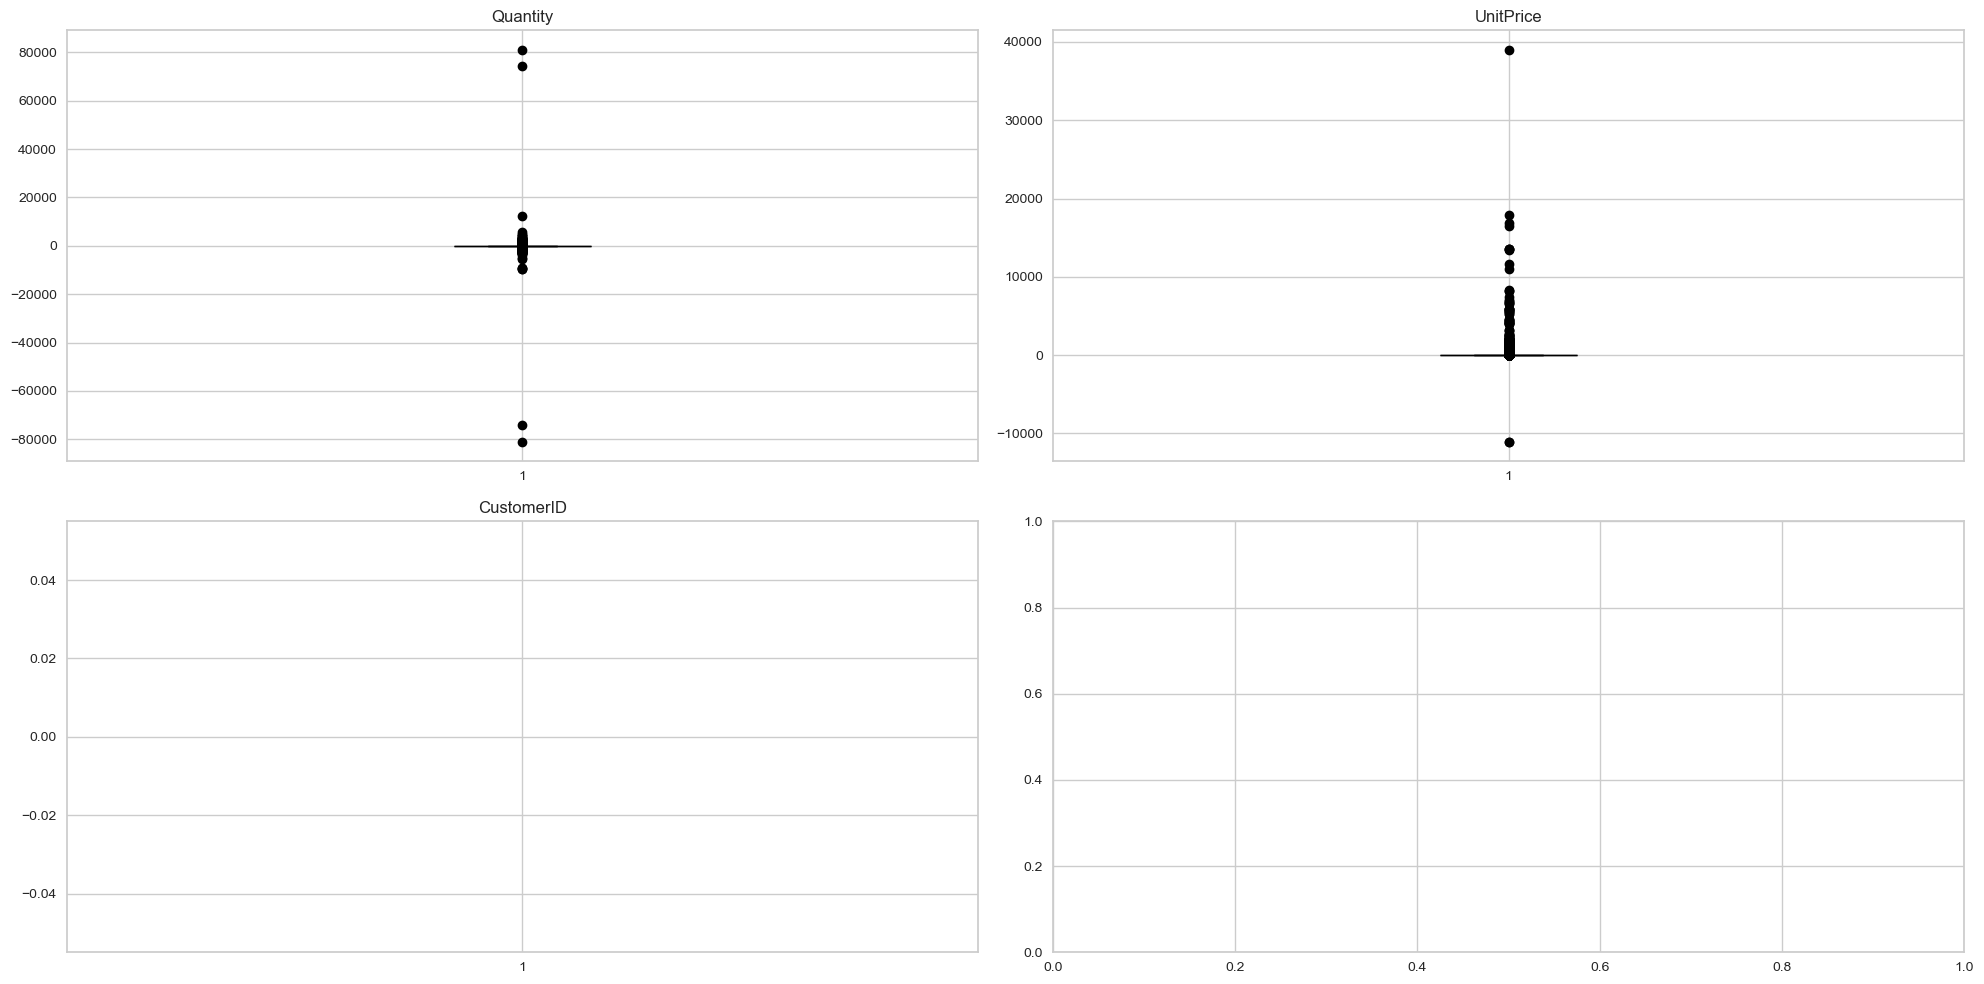

In [8]:
from funciones.funciones import plot_outliers
plot_outliers(df_retail)



### 📦 Quantity
- Se observan **valores extremadamente altos y bajos**.
- **Outliers positivos:** cantidades mayores a 80.000 unidades podrían ser errores o ventas mayoristas atípicas.
- **Outliers negativos:** cantidades negativas (ej. -80.000) probablemente representan **devoluciones**.

---

### 💵 UnitPrice
- Se detectan **valores negativos**, lo cual **no tiene sentido comercial** (precio < 0).
- También hay **precios excesivamente altos** (ej. > 30.000), posiblemente errores tipográficos.

Decido eliminar los outliers negativos, ya que no tienen sentido comercial. Para los outliers positivos, los mantengo, ya que podrían representar ventas mayoristas o productos de lujo.



<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">LIMPIEZA DE DATOS</p>

In [9]:
# Filtrar facturas que empiezan con "C"
df_devoluciones = df_retail[df_retail['InvoiceNo'].astype(str).str.startswith('C')]

print(f"Hay {df_devoluciones.shape[0]} registros de devoluciones.")
df_devoluciones[['InvoiceNo', 'CustomerID', 'Description', 'Quantity', 'UnitPrice']].head(10)

Hay 9288 registros de devoluciones.


,InvoiceNo,CustomerID,Description,Quantity,UnitPrice
141,C536379,14527.0,Discount,-1,27.50
154,C536383,15311.0,SET OF 3 COLOURED FLYING DUCKS,-1,4.65
235,C536391,17548.0,PLASTERS IN TIN CIRCUS PARADE,-12,1.65
236,C536391,17548.0,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29
237,C536391,17548.0,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29
238,C536391,17548.0,PACK OF 12 RED RETROSPOT TISSUES,-24,0.29
239,C536391,17548.0,CHICK GREY HOT WATER BOTTLE,-12,3.45
240,C536391,17548.0,PLASTERS IN TIN VINTAGE PAISLEY,-12,1.65
241,C536391,17548.0,PLASTERS IN TIN SKULLS,-24,1.65
939,C536506,17897.0,JAM MAKING SET WITH JARS,-6,4.25


💡 **¿Por qué eliminarlas?**

- Las facturas cuyo `InvoiceNo` comienza con la letra **"C"** representan **notas de crédito** o **devoluciones de productos** hechas por los clientes.
- Estas transacciones **restan stock** y en general **no reflejan un comportamiento de compra**.
- Pueden **distorsionar el cálculo** de gasto total, cantidad comprada y frecuencia de compra.
Como el objetivo es **entender el comportamiento de compra real**, se eliminan.


In [10]:
# Copia de seguridad del dataset original
df_clean = df_retail.copy()

# Elimino las filas con CustomerID nulo porque no puedo hacer nada con ellas
df_clean = df_clean.dropna(subset=['CustomerID'])

# Filtro las cantidades y precios mayores a cero porque no tienen sentido
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]

# Elimino las devoluciones (InvoiceNo que empieza con 'C')
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('C')]

df_clean.reset_index(drop=True, inplace=True)

print("Después de la limpieza, el dataset tiene", df_clean.shape[0], "filas y", df_clean.shape[1], "columnas.")
df_clean.head()

Después de la limpieza, el dataset tiene 397884 filas y 8 columnas.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">GENERACIÓN DE NUEVAS CARACTERÍSTICAS</p>

In [11]:
# 1. Creo la columna de monto gastado
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']

# 2. Agregación principal por CustomerID
df_clientes = df_clean.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',       # Número de compras distintas
    'Quantity': 'sum',            # Cantidad total de productos comprados
    'TotalAmount': 'sum',         # Gasto total
    'Country': 'first'            # País 
}).rename(columns={
    'InvoiceNo': 'n_compras',
    'Quantity': 'cantidad_total',
    'TotalAmount': 'gasto_total',
    'Country': 'pais'
}).reset_index()

# 3. Obtengo el producto más comprado por cliente
top_product = df_clean.groupby(['CustomerID', 'Description'])['Quantity'].sum().reset_index()
idx = top_product.groupby('CustomerID')['Quantity'].idxmax()
productos_top = top_product.loc[idx][['CustomerID', 'Description']].set_index('CustomerID')

# 4. Mergeo el producto más comprado al DataFrame principal
df_clientes = df_clientes.set_index('CustomerID')
df_clientes['producto_top'] = productos_top['Description']
df_clientes = df_clientes.reset_index()

# 5. Tomo como fecha de referencia la fecha máxima de compra
fecha_max = df_clean['InvoiceDate'].max()

# 6. Recencia (días desde la última compra)
ultima_compra = df_clean.groupby('CustomerID')['InvoiceDate'].max()
recencia_dias = (fecha_max - ultima_compra).dt.days

# 7. Número de productos distintos
n_productos_distintos = df_clean.groupby('CustomerID')['Description'].nunique()

# 8. Ticket promedio
ticket_promedio = df_clientes['gasto_total'] / df_clientes['n_compras']

# 9. Frecuencia mensual
dias_totales = (df_clean['InvoiceDate'].max() - df_clean['InvoiceDate'].min()).days
frecuencia_mensual = df_clientes['n_compras'] / (dias_totales / 30)

# 10. Intensidad de compra (productos por compra)
intensidad_compra = df_clientes['cantidad_total'] / df_clientes['n_compras']

In [12]:
# --- Asigno al DataFrame usando .map() donde corresponda ---
df_clientes['recencia_dias'] = df_clientes['CustomerID'].map(recencia_dias)
df_clientes['n_productos_distintos'] = df_clientes['CustomerID'].map(n_productos_distintos)
df_clientes['ticket_promedio'] = ticket_promedio
df_clientes['frecuencia_mensual'] = frecuencia_mensual
df_clientes['intensidad_compra'] = intensidad_compra

In [13]:
df_clientes.head()

,CustomerID,n_compras,cantidad_total,gasto_total,pais,producto_top,recencia_dias,n_productos_distintos,ticket_promedio,frecuencia_mensual,intensidad_compra
0,12346.0,1,74215,77183.60,United Kingdom,MEDIUM CERAMIC TOP STORAGE JAR,325,1,77183.600000,0.080429,74215.000000
1,12347.0,7,2458,4310.00,Iceland,ICE CREAM SUNDAE LIP GLOSS,1,103,615.714286,0.563003,351.142857
2,12348.0,4,2341,1797.24,Finland,DOUGHNUT LIP GLOSS,74,22,449.310000,0.321716,585.250000
3,12349.0,1,631,1757.55,Italy,STRAWBERRY CERAMIC TRINKET POT,18,73,1757.550000,0.080429,631.000000
4,12350.0,1,197,334.40,Norway,TEA BAG PLATE RED RETROSPOT,309,17,334.400000,0.080429,197.000000


---

### →  Agrupaciones

1. Clasificación de gasto: bajo, medio, alto

In [14]:
# Se usan cuantiles para segmentar los datos. Uso q=3 porque quiero segmentar en 3 grupos. 
df_clientes['segmento_gasto'] = pd.qcut(df_clientes['gasto_total'], q=3, labels=['Bajo', 'Medio', 'Alto'])

2. Asignación de continente

In [15]:
# Diccionario de país a continente
pais_a_continente = {
    'United Kingdom': 'Europa',
    'France': 'Europa',
    'Germany': 'Europa',
    'Spain': 'Europa',
    'Portugal': 'Europa',
    'Italy': 'Europa',
    'Belgium': 'Europa',
    'Netherlands': 'Europa',
    'Norway': 'Europa',
    'Sweden': 'Europa',
    'Switzerland': 'Europa',
    'Finland': 'Europa',
    'Austria': 'Europa',
    'Denmark': 'Europa',
    'Cyprus': 'Europa',
    'Australia': 'Oceanía',
    'Japan': 'Asia',
    'Singapore': 'Asia',
    'Hong Kong': 'Asia',
    'Israel': 'Asia',
    'Iceland': 'Europa',
    'Brazil': 'América',
    'Canada': 'América',
    'USA': 'América',
    'Bahrain': 'Oriente Medio',
    'Saudi Arabia': 'Oriente Medio',
    'United Arab Emirates': 'Oriente Medio'
}

df_clientes['continente'] = df_clientes['pais'].map(pais_a_continente).fillna('Otro')


 3. Segmentación de recencia

In [16]:
# Se usan cuantiles para segmentar los datos nuevamente, pero en base a la recencia (días desde la última compra). Uso q=3 porque quiero segmentar en 3 grupos.
df_clientes['segmento_recencia'] = pd.qcut(df_clientes['recencia_dias'], q=3, labels=['Reciente', 'Intermedio', 'Inactivo'])

4. Clasificación por tipo de cliente

In [17]:
# Creo la columna de segmento_gasto creando 3 grupos de acuerdo a distintas condiciones:
# Premium: Alto gasto y frecuencia mensual mayor a la mediana
# Estándar: Medio gasto
# Ocasional: Bajo gasto o frecuencia mensual menor a la mediana

def clasificar_tipo(row):
    if row['segmento_gasto'] == 'Alto' and row['frecuencia_mensual'] > df_clientes['frecuencia_mensual'].median():
        return 'Premium'
    elif row['segmento_gasto'] == 'Medio':
        return 'Estándar'
    else:
        return 'Ocasional'

df_clientes['tipo_cliente'] = df_clientes.apply(clasificar_tipo, axis=1)

In [18]:
df_clientes.head()

,CustomerID,n_compras,cantidad_total,gasto_total,pais,producto_top,recencia_dias,n_productos_distintos,ticket_promedio,frecuencia_mensual,intensidad_compra,segmento_gasto,continente,segmento_recencia,tipo_cliente
0,12346.0,1,74215,77183.60,United Kingdom,MEDIUM CERAMIC TOP STORAGE JAR,325,1,77183.600000,0.080429,74215.000000,Alto,Europa,Inactivo,Ocasional
1,12347.0,7,2458,4310.00,Iceland,ICE CREAM SUNDAE LIP GLOSS,1,103,615.714286,0.563003,351.142857,Alto,Europa,Reciente,Premium
2,12348.0,4,2341,1797.24,Finland,DOUGHNUT LIP GLOSS,74,22,449.310000,0.321716,585.250000,Alto,Europa,Intermedio,Premium
3,12349.0,1,631,1757.55,Italy,STRAWBERRY CERAMIC TRINKET POT,18,73,1757.550000,0.080429,631.000000,Alto,Europa,Reciente,Ocasional
4,12350.0,1,197,334.40,Norway,TEA BAG PLATE RED RETROSPOT,309,17,334.400000,0.080429,197.000000,Bajo,Europa,Inactivo,Ocasional


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">ANÁLISIS EXPLORATORIO</p>

> Se selecciona **Europa** como foco del análisis porque incluye a casi todos los países representados en el dataset, con más del 93% de las transacciones originadas en el Reino Unido.

### 🛍️ **Top 10 Productos Más Vendidos**

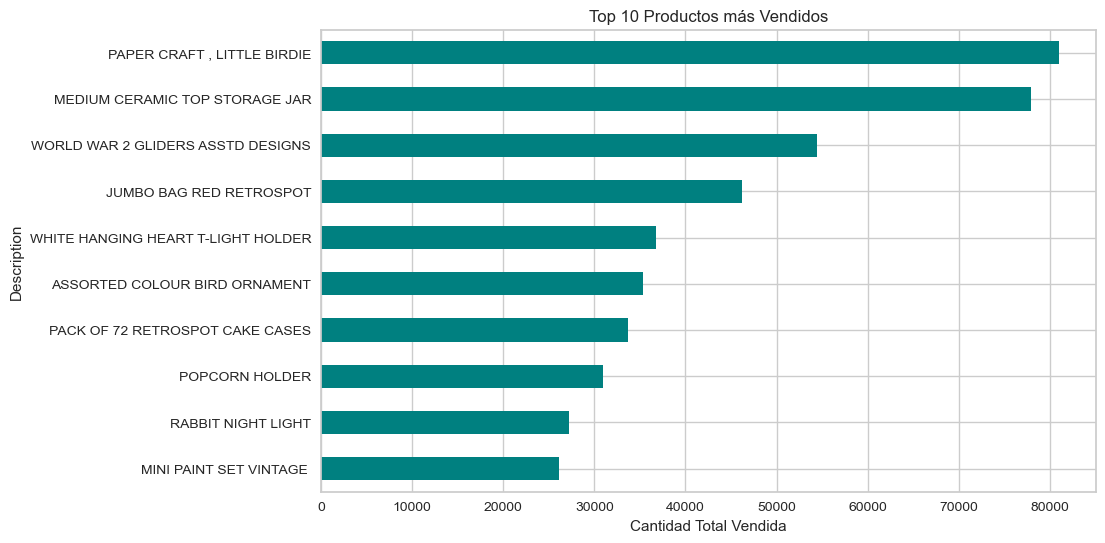

In [19]:
top_products = df_clean.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(10, 6), color='teal')
plt.xlabel("Cantidad Total Vendida")
plt.title("Top 10 Productos más Vendidos")
plt.gca().invert_yaxis()
plt.show()

- Los productos más vendidos por cantidad son en su mayoría artículos decorativos o utilitarios pequeños.
- Se destacan:
  - `PAPER CRAFT , LITTLE BIRDIE`
  - `MEDIUM CERAMIC TOP STORAGE JAR`
- Este patrón indica una posible alta rotación en artículos económicos y de regalo.

### 🌍 **Distribución de Transacciones por País (Top 4)**

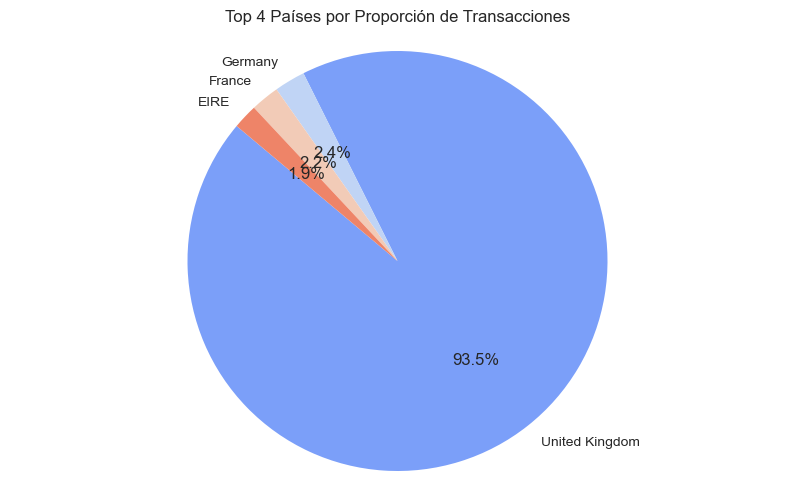

In [20]:
top4_countries = df_clean['Country'].value_counts().head(4)

plt.figure(figsize=(10, 6))
plt.pie(top4_countries.values, labels=top4_countries.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm', 4))
plt.title("Top 4 Países por Proporción de Transacciones")
plt.axis('equal') 
plt.show()

- **United Kingdom** concentra el **93.5%** de todas las transacciones.
- Le siguen de forma marginal: **Germany**, **France** e **Irlanda**.
- Esta fuerte concentración valida el enfoque analítico exclusivo en Europa.

### 👥 **Clientes con Mayor Cantidad de Productos Comprados**

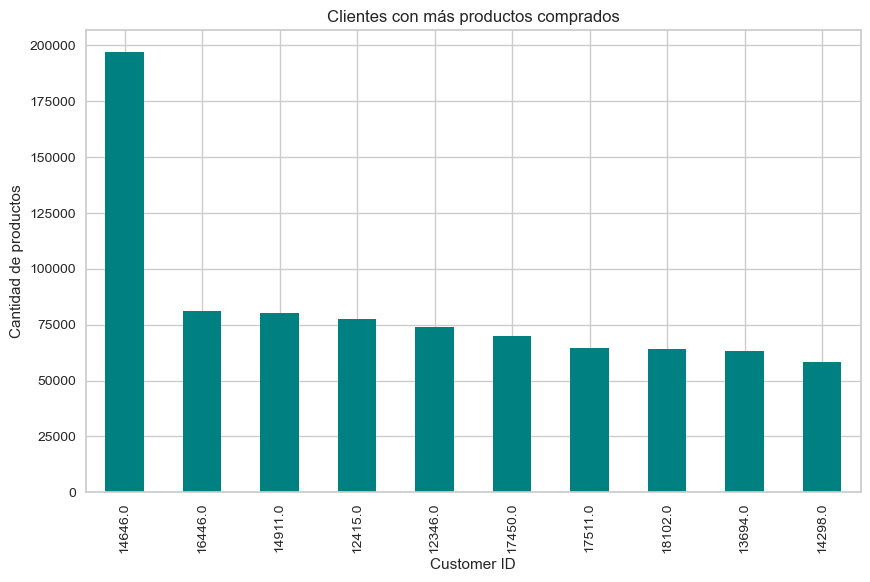

In [21]:
df_retail['CustomerID'] = df_clean['CustomerID'].astype('str')
prod_per_customer = df_clean.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(10)
prod_per_customer.plot(kind='bar', figsize=(10, 6), color='teal')
plt.title('Clientes con más productos comprados')
plt.xlabel('Customer ID')
plt.ylabel('Cantidad de productos')
plt.show()

- Un grupo reducido de clientes realiza un volumen de compras significativamente superior.
- El cliente con ID `14646.0` supera ampliamente al resto.
- Se observa una **distribución altamente desbalanceada**, con fuerte presencia de clientes top.

### 🔁 **Frecuencia Mensual por Segmento de Gasto**

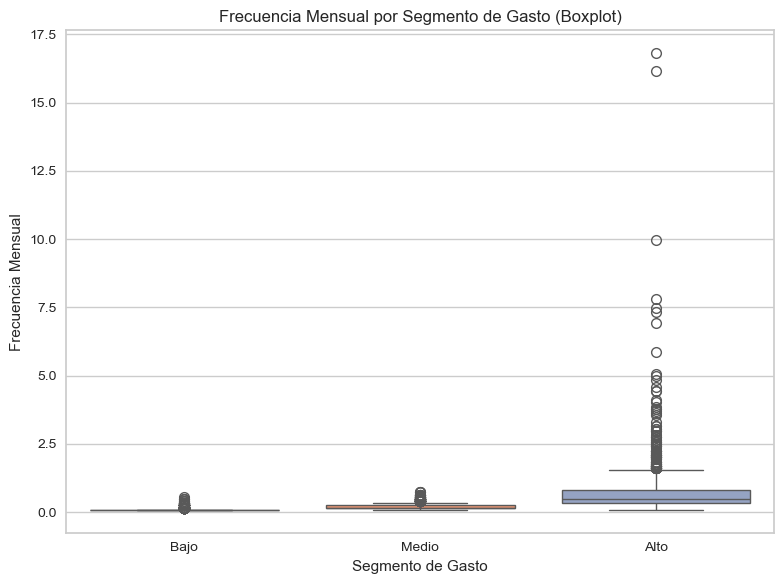

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clientes, x='segmento_gasto', y='frecuencia_mensual', palette='Set2')
plt.title("Frecuencia Mensual por Segmento de Gasto (Boxplot)")
plt.xlabel("Segmento de Gasto")
plt.ylabel("Frecuencia Mensual")
plt.tight_layout()
plt.show()


- Los clientes del **segmento de gasto Alto** presentan mayor dispersión en la frecuencia de compra.
- Los segmentos **Medio** y **Bajo** se agrupan con frecuencias mucho más reducidas.
- Esto sugiere que el gasto alto no siempre implica alta frecuencia, pero sí mayor variabilidad en comportamiento.

### 🧩 **Distribución de Tipo de Cliente en Europa**

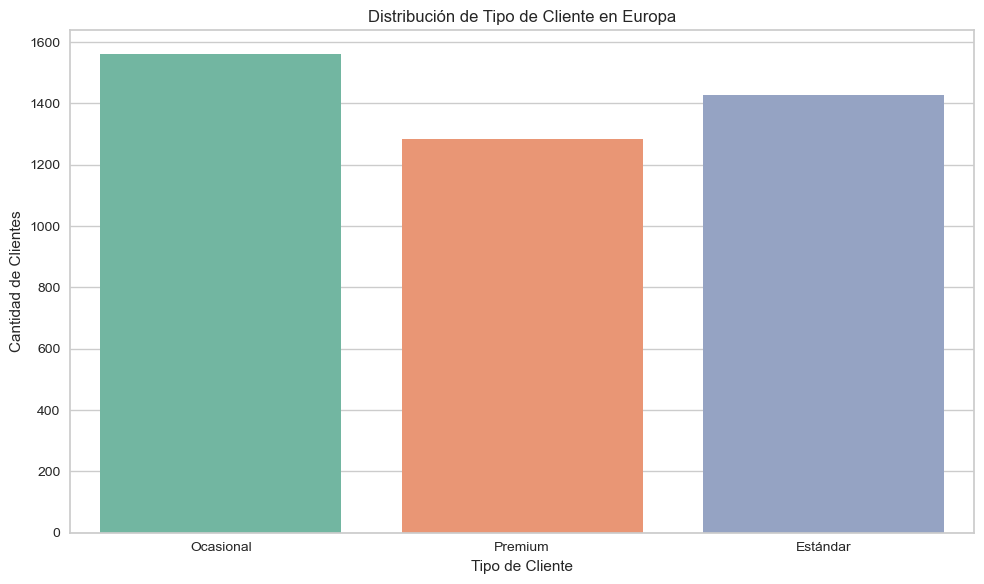

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clientes[df_clientes['continente'] == 'Europa'], x='tipo_cliente', palette='Set2')
plt.title("Distribución de Tipo de Cliente en Europa")
plt.xlabel("Tipo de Cliente")
plt.ylabel("Cantidad de Clientes")
plt.tight_layout()
plt.show()

- La mayoría de los clientes europeos se distribuyen entre:
  - **Ocasional**: ~40%
  - **Estándar**: ~35%
  - **Premium**: ~25%
- Esto indica que, si bien existe una base fiel de clientes recurrentes, el volumen está fuertemente impulsado por **clientes de compra ocasional**.


## ✅ Conclusión General
El análisis sugiere que la empresa se apoya principalmente en ventas de productos de bajo costo, distribuidos a través de un gran número de clientes esporádicos. Sin embargo, existe un subconjunto pequeño pero clave de **clientes de alto valor** que representan una proporción desproporcionada del volumen de ventas. Este grupo debería ser el foco de estrategias de retención y fidelización.


---

### →  Gráfico relativo de algunas características seleccionadas: Un subconjunto de datos

<Figure size 800x550 with 0 Axes>

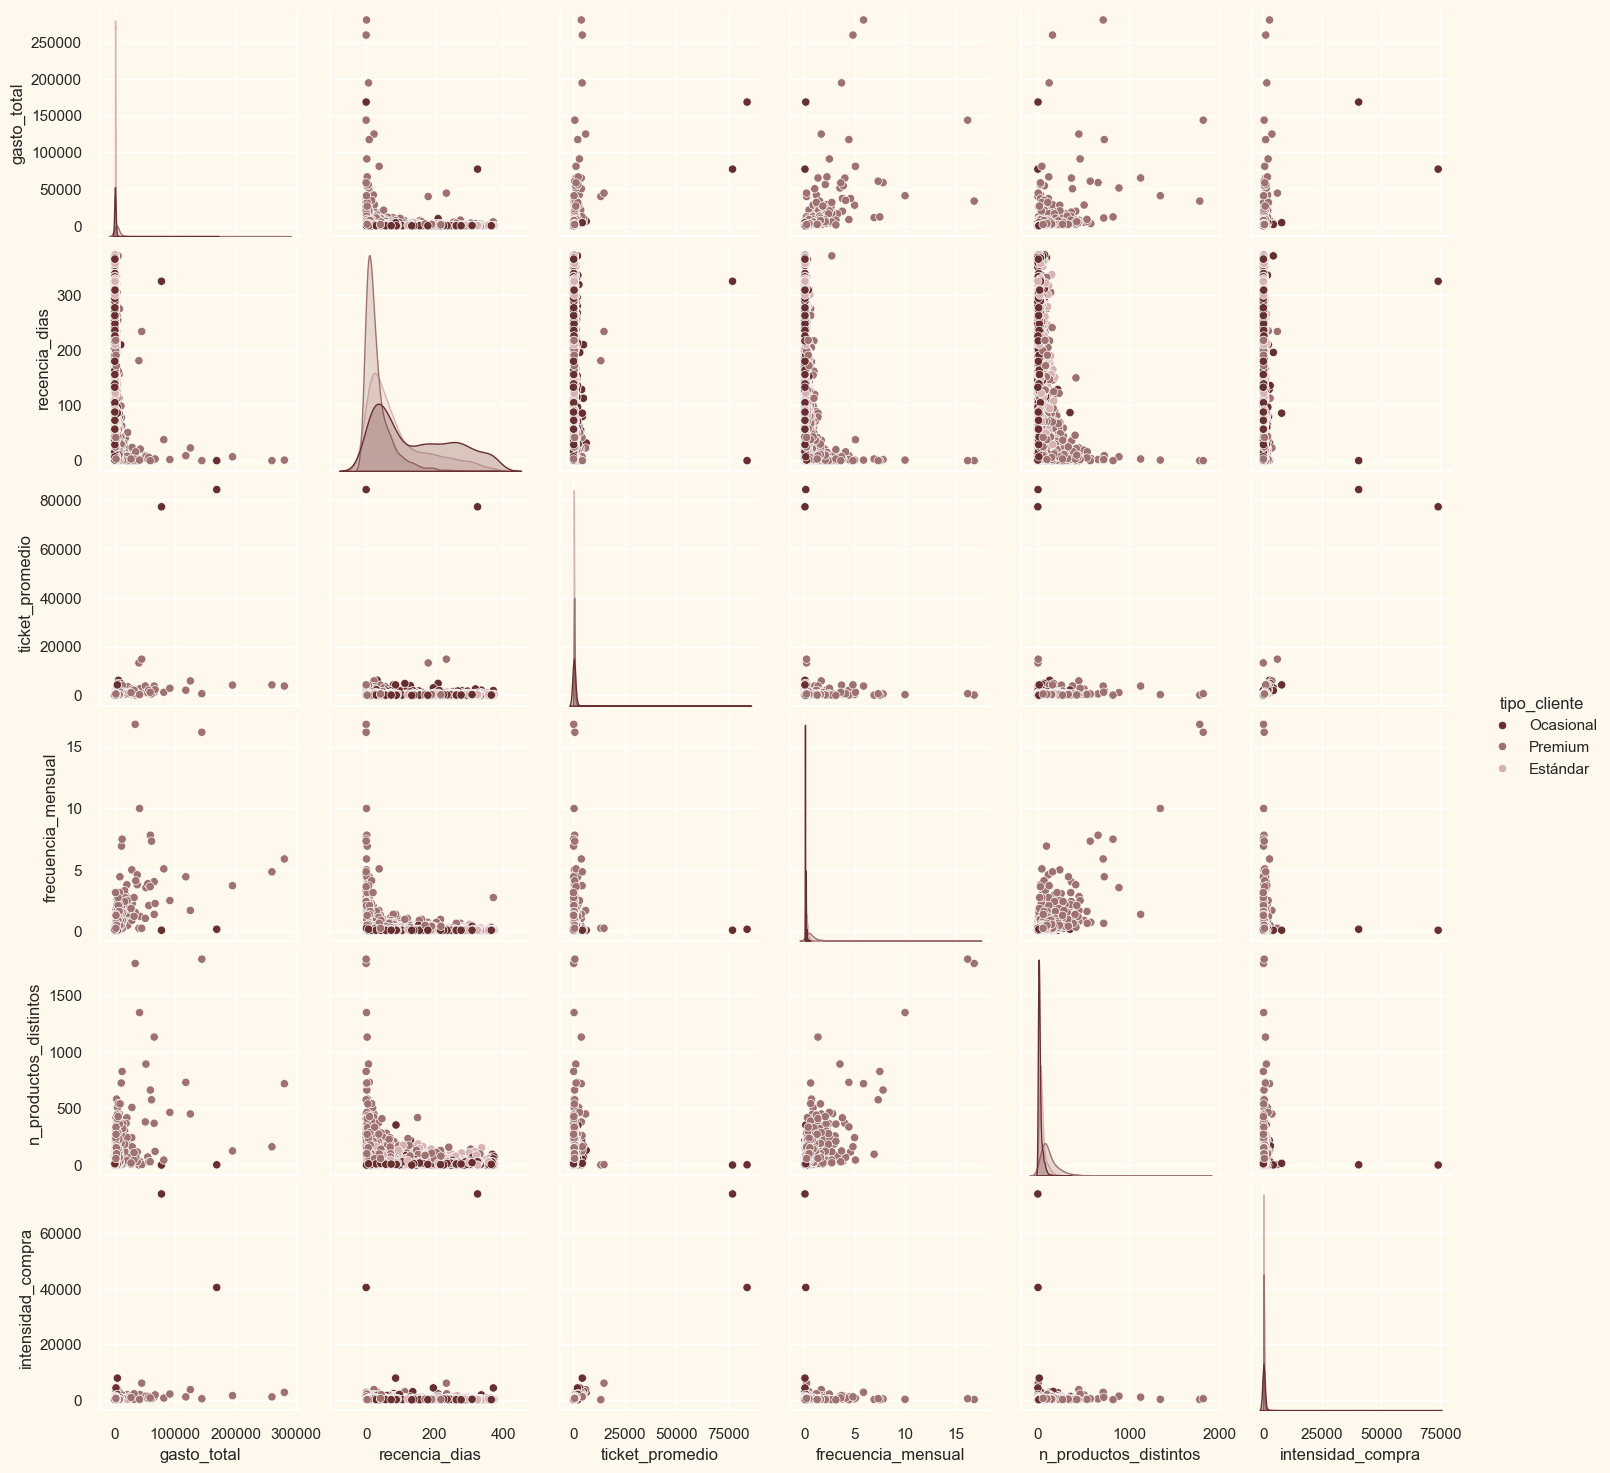

In [24]:
# Configuración de colores personalizada
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(pallet)

# Variables a graficar (revisá que existan en tu df_clientes)
To_Plot = ["gasto_total", "recencia_dias", "ticket_promedio", "frecuencia_mensual", "n_productos_distintos", "intensidad_compra"]

# Elegimos un hue que represente el perfil: tipo_cliente o segmento_gasto
plt.figure()
sns.pairplot(df_clientes[To_Plot + ["tipo_cliente"]], hue="tipo_cliente", palette=pallet)
plt.show()


## 📊 Conclusiones del Análisis Visual (Pairplot)

- **Distribuciones sesgadas**: La mayoría de las variables (como `gasto_total`, `ticket_promedio` e `intensidad_compra`) presentan una fuerte **asimetría positiva** (muchos clientes gastan poco y unos pocos gastan muchísimo). Esto sugiere la necesidad de escalar o transformar estas variables antes del clustering.

- **Agrupamientos difusos entre perfiles**:
  - No hay **fronteras claramente separadas** entre `tipo_cliente` (Premium, Estándar, Ocasional) en el espacio bidimensional. Los puntos están **superpuestos**, lo cual indica que los perfiles no son perfectamente distinguibles solo con estas variables.
  - Sin embargo, se observa cierta **tendencia de los clientes Premium** a concentrarse en niveles más altos de `gasto_total`, `ticket_promedio` y `frecuencia_mensual`.

- **Relación esperada entre variables**:
  - `ticket_promedio` y `gasto_total` tienen una **correlación positiva moderada** (a mayor gasto total, mayor ticket).
  - `recencia_dias` tiende a ser **más baja** en clientes con mayor frecuencia de compra, lo que tiene sentido: los clientes activos compraron más recientemente.

- **Outliers**:
  - Existen varios **clientes atípicos** con valores extremadamente altos en `gasto_total` o `ticket_promedio`. Es recomendable considerar **transformaciones logarítmicas** o tratarlos como **casos especiales** para no distorsionar la segmentación.

- **Variables útiles para clustering**:
  - Variables como `frecuencia_mensual`, `ticket_promedio`, `n_productos_distintos` e `intensidad_compra` muestran suficiente variabilidad como para ser **buenas candidatas** para segmentación no supervisada.

---

### →  Correlación entre variables

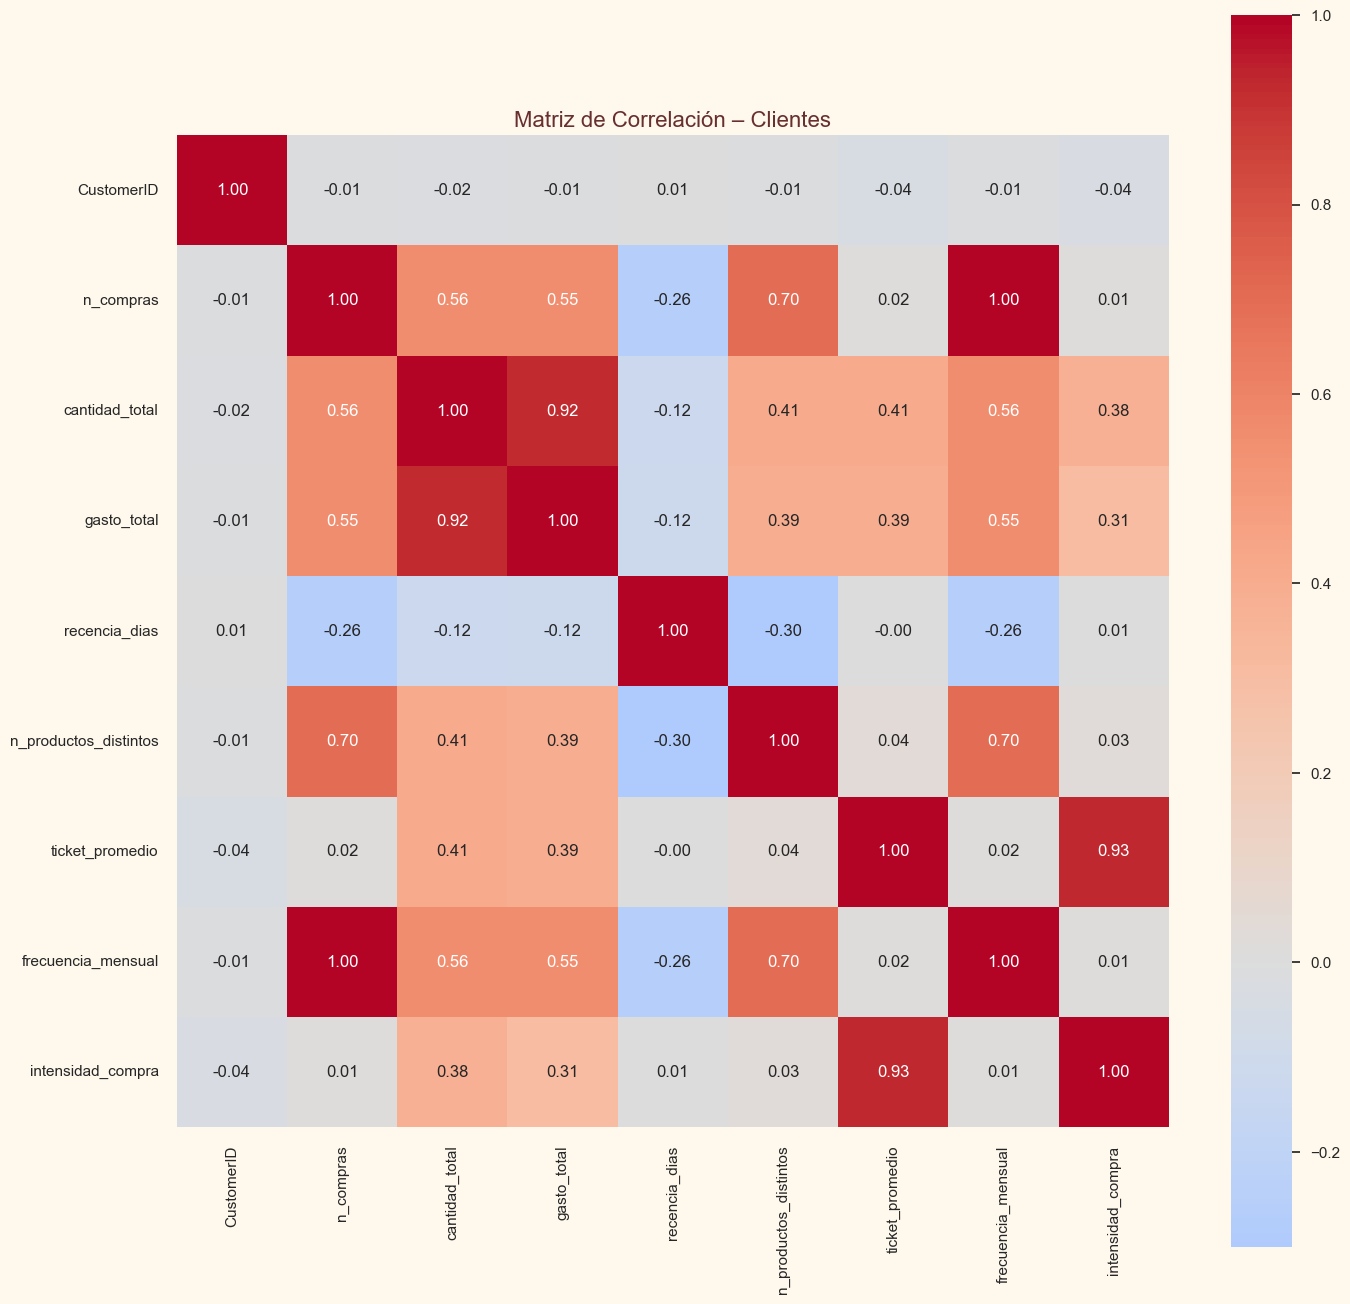

In [25]:
numeric_data = df_clientes.select_dtypes(include=[np.number])
corrmat = numeric_data.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corrmat, annot=True, cmap="coolwarm", center=0, fmt=".2f", square=True)
plt.title("Matriz de Correlación – Clientes", fontsize=16, color="#682F2F")
plt.show()


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">PREPROCESAMIENTO DE LOS DATOS</p>

En esta sección, realizaré el preprocesamiento del dataset para preparar los datos antes de aplicar técnicas de **clustering**.

**Los pasos aplicados en esta etapa son:**

- 🔁 **Transformación logarítmica** en variables numéricas sesgadas para reducir la influencia de outliers y mejorar la simetría de las distribuciones.
- 🏷️ **Codificación de etiquetas** en las características categóricas, usando `LabelEncoder` para convertirlas a valores numéricos.
- 📏 **Escalado de las características** mediante `StandardScaler` para estandarizar los valores y asegurar que todas las variables tengan igual importancia.
- 📊 **Creación de un DataFrame escalado** (`scaled_df`), que va a ser usado para la reducción de dimensionalidad y posterior segmentación no supervisada.


In [26]:
# 1. Copiar el DataFrame original
data = df_clientes.copy()
# ❌ Eliminar 'CustomerID' y 'pais' antes de cualquier transformación
data = df_clientes.drop(columns=["CustomerID", "pais"])

## 🚫 ¿Por qué no incluir `CustomerID` en PCA o Clustering?

| Motivo                               | Justificación                                                                                                                              |
|--------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------|
| ❌ **No representa comportamiento**   | Es un identificador arbitrario, no guarda relación con hábitos de compra, frecuencia, ni gasto.                                            |
| ❌ **Crea patrones artificiales**     | Si se incluye, puede influir erróneamente en la segmentación, ya que PCA o KMeans intentarán explicarlo como si fuera una variable válida. |
| ❌ **Tiene escala propia**            | Es un número grande sin sentido ordinal o continuo para el análisis.                                                                       |
| ✅ **Solo se usa como identificador** | Puede mantenerse en `df_clientes` original para visualizaciones o unir resultados, pero **debe excluirse del pipeline analítico**.         |




In [ ]:
# 2. Variables numéricas sesgadas para la transformación logarítmica
log_cols = ['gasto_total', 'ticket_promedio', 'cantidad_total', 'intensidad_compra', 'n_productos_distintos']

# Aplico log1p para reducir sesgo y outliers
data[log_cols] = data[log_cols].apply(np.log1p)

In [28]:
# 3. Detección de columnas no numéricas (object, category, etc.)
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns.tolist()
print("Columnas no numéricas que serán codificadas:", non_numeric_cols)

# Aplico LabelEncoder a las columnas no numéricas
LE = LabelEncoder()
for col in non_numeric_cols:
    data[col] = LE.fit_transform(data[col])

print("✅ Columnas no numéricas codificadas correctamente.")


Columnas no numéricas que serán codificadas: ['producto_top', 'segmento_gasto', 'continente', 'segmento_recencia', 'tipo_cliente']
✅ Columnas no numéricas codificadas correctamente.


## 🌍 ¿Por qué usar `continente` en lugar de `pais` para el LabelEncoder?

➡️ Usar `continente` es **más robusto, interpretable y eficiente** que `pais`.

| Motivo                           | Detalle                                                                             |
|----------------------------------|-------------------------------------------------------------------------------------|
| 🔢 **Baja cardinalidad**         | Solo 6 categorías → perfecto para aplicar `LabelEncoder` sin riesgo de sesgo.      |
| 🎯 **Generaliza comportamiento** | Agrupa mercados regionales con características comunes (Europa, Asia, América...). |
| 🧠 **Reduce ruido**              | Evitás que países con muy pocos registros (1–2 compras) distorsionen los clusters. |
| ⚙️ **Facilita interpretación**   | Más claro comparar resultados a nivel continental que entre 30+ países.            |

> ✅ Recomendación: **Usar `continente` en el pipeline de clustering/PCA** y dejar `pais` para análisis descriptivos o reportes detallados.


In [29]:
# 4. Escalado con StandardScaler
# ========================================
# a. Dataset escalado sin remover outliers
# ========================================
scaler = StandardScaler()
scaled_array = scaler.fit_transform(data)  # 'data' ya debe estar codificado y transformado
scaled_df = pd.DataFrame(scaled_array, columns=data.columns)

print("✅ Escalado completo sin remover outliers → 'scaled_df' generado.")

# ========================================
# b. Dataset limpio (remover outliers) y luego escalar
# ========================================

# Calcular z-score sobre 'data' sin escalar (ya transformado y codificado)
z_scores = np.abs(zscore(data))
threshold = 3
mask_kmeans = (z_scores < threshold).all(axis=1)

# Aplicar máscara
data_clean = data[mask_kmeans].copy()
df_clientes_clean = df_clientes.loc[mask_kmeans].copy()

# Escalar datos sin outliers
scaled_array_clean = scaler.fit_transform(data_clean)
scaled_df_clean = pd.DataFrame(scaled_array_clean, columns=data_clean.columns)

print(f"✅ Datos sin outliers escalados → 'scaled_df_clean' generado ({len(scaled_df_clean)} filas)")

✅ Escalado completo sin remover outliers → 'scaled_df' generado.
✅ Datos sin outliers escalados → 'scaled_df_clean' generado (4147 filas)


In [30]:
print("✅ Transformaciones logarítmicas aplicadas a variables sesgadas.")
print("✅ Todas las variables están codificadas y escaladas.")
print("📊 DataFrame final listo para clustering o PCA:")
scaled_df.head()

✅ Transformaciones logarítmicas aplicadas a variables sesgadas.
✅ Todas las variables están codificadas y escaladas.
📊 DataFrame final listo para clustering o PCA:


,n_compras,cantidad_total,gasto_total,producto_top,recencia_dias,n_productos_distintos,ticket_promedio,frecuencia_mensual,intensidad_compra,segmento_gasto,continente,segmento_recencia,tipo_cliente
0,-0.425097,3.816653,3.706225,0.250474,2.334574,-2.525776,7.523483,-0.425097,6.828298,-1.224745,-0.069253,-1.226527,0.040850
1,0.354417,1.329485,1.411843,-0.059928,-0.905340,0.961635,1.038408,0.354417,0.905794,-1.224745,-0.069253,1.215830,1.297636
2,-0.035340,1.293900,0.716489,-0.617444,-0.175360,-0.370134,0.616141,-0.035340,1.469974,-1.224745,-0.069253,-0.005349,1.297636
3,-0.425097,0.337734,0.698739,1.368521,-0.735345,0.661260,2.445437,-0.425097,1.553147,-1.224745,-0.069253,1.215830,0.040850
4,-0.425097,-0.509484,-0.618962,1.407698,2.174578,-0.586482,0.220538,-0.425097,0.268494,0.000000,-0.069253,-1.226527,0.040850


In [31]:
# dropear segmento_gasto, segmento_recencia + tipo_cliente + producto_top + pais y a continente hacerle un .get_dummies 
# NO SE USAN para PCA y entrenar los modelos de clustering, pero si las dejo para los crosstabs (son como etiqueta) --> son arbitrarias + se crearon a partir de datos ya existentes.

In [32]:
columnas_arbitrarias = ['segmento_gasto', 'segmento_recencia', 'tipo_cliente', 
                        'producto_top', 'continente']

<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">REDUCCIÓN DE DIMENSIONALIDAD</p>

En este problema, hay muchos factores (atributos o características) sobre los cuales se va a hacer la clasificación final. Cuantas más características haya, más difícil va a ser trabajar con ellas. Muchas de estas características están correlacionadas y, por lo tanto, son redundantes. Es por eso que voy a hacer una **reducción de dimensionalidad** sobre las características seleccionadas antes de pasar a la parte de clustering.

> *La reducción de dimensionalidad es el proceso de reducir el número de variables aleatorias bajo consideración, obteniendo un conjunto de variables principales.*

---

### 🧠 ¿Qué es PCA?

**El Análisis de Componentes Principales (PCA)** es una técnica para reducir la dimensionalidad de conjuntos de datos de este tipo, aumentando la interpretabilidad pero al mismo tiempo minimizando la pérdida de información.

### ✨ Pasos en esta sección:

- Reducción de dimensionalidad con PCA
- Visualización del dataframe reducido en 3D


### 🔽 Reducción de dimensionalidad con PCA



In [33]:
# Separar columnas arbitrarias para análisis posterior
labels_clean = scaled_df_clean[columnas_arbitrarias].copy()
labels_full = scaled_df[columnas_arbitrarias].copy()

# Removerlas del input a modelos
scaled_df_clean = scaled_df_clean.drop(columns=columnas_arbitrarias, errors='ignore')
scaled_df = scaled_df.drop(columns=columnas_arbitrarias, errors='ignore')

In [34]:
# Inicia cronómetro
start_time = time.time()

In [35]:
# 1. Matriz de covarianza para KMeans (sin outliers)
cov_matrix_kmeans = np.cov(scaled_df_clean.T)
print("✅ Matriz de covarianza para KMeans calculada")

# 1. Matriz de covarianza para Agglomerative/DBSCAN (con outliers)
cov_matrix_others = np.cov(scaled_df.T)
print("✅ Matriz de covarianza para Agglomerative & DBSCAN calculada")


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
✅ Matriz de covarianza para KMeans calculada
✅ Matriz de covarianza para Agglomerative & DBSCAN calculada
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [36]:
# 2. Autovalores y Autovectores para KMeans
eig_vals_kmeans, eig_vecs_kmeans = np.linalg.eig(cov_matrix_kmeans)
print("\n🧮 Autovalores (KMeans):")
print(eig_vals_kmeans.round(3))
print("\n🧮 Autovectores (KMeans):")
print(eig_vecs_kmeans.round(3))

# 2. Autovalores y Autovectores para Agglomerative y DBSCAN
eig_vals_others, eig_vecs_others = np.linalg.eig(cov_matrix_others)
print("\n🧮 Autovalores (Agglomerative/DBSCAN):")
print(eig_vals_others.round(3))
print("\n🧮 Autovectores (Agglomerative/DBSCAN):")
print(eig_vecs_others.round(3))



🧮 Autovalores (KMeans):
[4.76  1.693 0.758 0.438 0.259 0.094 0.    0.   ]

🧮 Autovectores (KMeans):
[[-0.356 -0.443 -0.24   0.168  0.036 -0.299  0.707 -0.   ]
 [-0.44   0.09  -0.028  0.096  0.37   0.511  0.     0.624]
 [-0.441  0.022 -0.102  0.069 -0.364  0.568 -0.    -0.579]
 [ 0.246  0.161 -0.923 -0.207  0.093  0.104 -0.    -0.   ]
 [-0.362 -0.01   0.092 -0.916  0.015 -0.143 -0.    -0.   ]
 [-0.291  0.527 -0.117  0.14  -0.615 -0.338  0.     0.334]
 [-0.356 -0.443 -0.24   0.168  0.036 -0.299 -0.707 -0.   ]
 [-0.287  0.542  0.006  0.166  0.583 -0.302 -0.    -0.405]]

🧮 Autovalores (Agglomerative/DBSCAN):
[4.477 1.711 0.894 0.476 0.265 0.179 0.    0.   ]

🧮 Autovectores (Agglomerative/DBSCAN):
[[-0.314 -0.535 -0.248  0.131  0.066 -0.18   0.707 -0.   ]
 [-0.45   0.096  0.015 -0.     0.266  0.573 -0.     0.623]
 [-0.446  0.039 -0.019 -0.031 -0.483  0.488  0.    -0.571]
 [ 0.237  0.091 -0.846 -0.433  0.03   0.179  0.    -0.   ]
 [-0.363  0.002  0.26  -0.834  0.057 -0.319  0.    -0.   ]
 [

In [37]:
# 3. Varianza explicada manual para KMeans
total_var_kmeans = eig_vals_kmeans.sum()
explained_var_ratio_kmeans = eig_vals_kmeans / total_var_kmeans
cumulative_var_kmeans = np.cumsum(explained_var_ratio_kmeans)

# 3. Varianza explicada manual para Agglomerative/DBSCAN
total_var_others = eig_vals_others.sum()
explained_var_ratio_others = eig_vals_others / total_var_others
cumulative_var_others = np.cumsum(explained_var_ratio_others)

In [38]:
# 4. Tabla resumen para KMeans
var_df_kmeans = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(eig_vals_kmeans))],
    'Eigenvalue': eig_vals_kmeans,
    'Explained Variance Ratio': explained_var_ratio_kmeans,
    'Cumulative Variance': cumulative_var_kmeans
}).round(4)

print("📊 Tabla resumen de PCA (KMeans):")
display(var_df_kmeans)

# 4. Tabla resumen para Agglomerative/DBSCAN
var_df_others = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(eig_vals_others))],
    'Eigenvalue': eig_vals_others,
    'Explained Variance Ratio': explained_var_ratio_others,
    'Cumulative Variance': cumulative_var_others
}).round(4)

print("📊 Tabla resumen de PCA (Agglomerative/DBSCAN):")
display(var_df_others)


📊 Tabla resumen de PCA (KMeans):


,PC,Eigenvalue,Explained Variance Ratio,Cumulative Variance
0,PC1,4.7598,0.5948,0.5948
1,PC2,1.6928,0.2115,0.8064
2,PC3,0.7581,0.0947,0.9011
3,PC4,0.4377,0.0547,0.9558
4,PC5,0.2595,0.0324,0.9882
5,PC6,0.0941,0.0118,1.0000
6,PC7,0.0000,0.0000,1.0000
7,PC8,0.0000,0.0000,1.0000


📊 Tabla resumen de PCA (Agglomerative/DBSCAN):


,PC,Eigenvalue,Explained Variance Ratio,Cumulative Variance
0,PC1,4.4774,0.5595,0.5595
1,PC2,1.7110,0.2138,0.7734
2,PC3,0.8938,0.1117,0.8851
3,PC4,0.4755,0.0594,0.9445
4,PC5,0.2647,0.0331,0.9776
5,PC6,0.1793,0.0224,1.0000
6,PC7,0.0000,0.0000,1.0000
7,PC8,0.0000,0.0000,1.0000


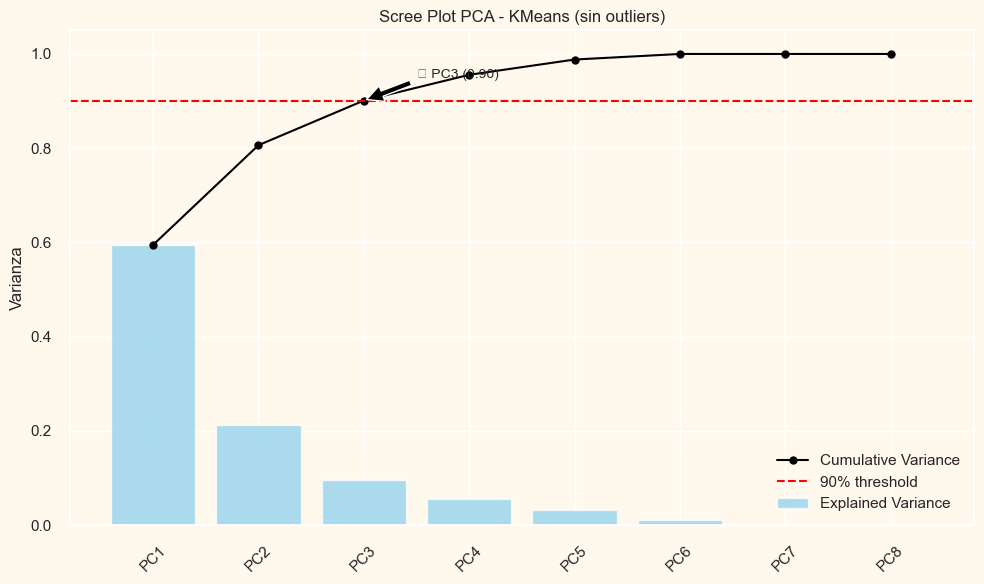

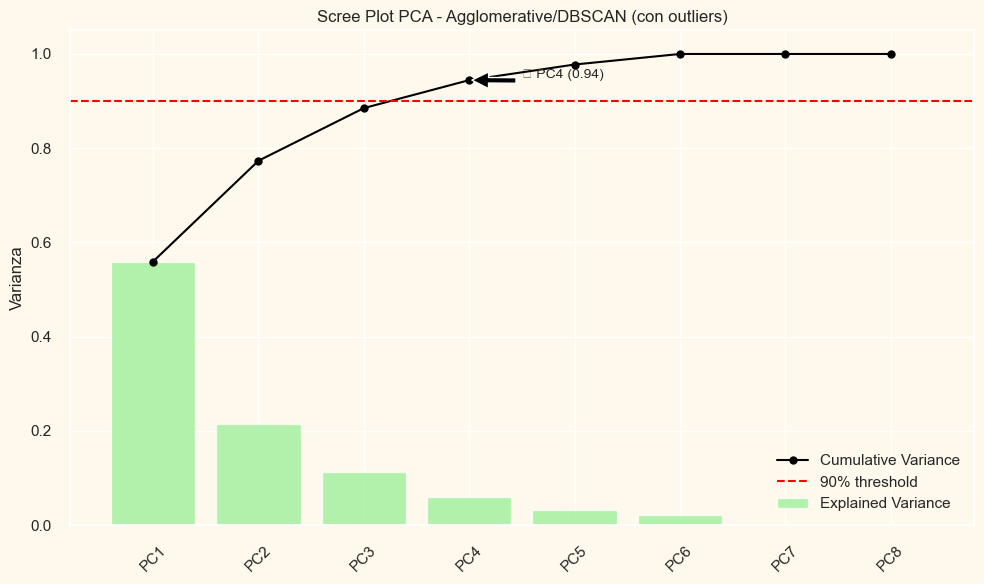

In [39]:
threshold = 0.90  # podés ajustar este valor más adelante si hacés una visualización o modelado con otro objetivo

# --- Scree plot para KMeans ---
plt.figure(figsize=(10, 6))
plt.bar(var_df_kmeans['PC'], var_df_kmeans['Explained Variance Ratio'], alpha=0.7, color='skyblue', label='Explained Variance')
plt.plot(var_df_kmeans['PC'], var_df_kmeans['Cumulative Variance'], marker='o', color='black', label='Cumulative Variance')
plt.axhline(y=threshold, color='red', linestyle='--', label=f'{int(threshold*100)}% threshold')

opt_component_kmeans = np.argmax(var_df_kmeans['Cumulative Variance'] >= threshold)
plt.annotate(f"⭢ {var_df_kmeans['PC'][opt_component_kmeans]} ({var_df_kmeans['Cumulative Variance'][opt_component_kmeans]:.2f})",
             xy=(opt_component_kmeans, var_df_kmeans['Cumulative Variance'][opt_component_kmeans]),
             xytext=(opt_component_kmeans+0.5, threshold+0.05),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)
plt.title("Scree Plot PCA - KMeans (sin outliers)")
plt.ylabel("Varianza")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# --- Scree plot para Agglomerative/DBSCAN ---
plt.figure(figsize=(10, 6))
plt.bar(var_df_others['PC'], var_df_others['Explained Variance Ratio'], alpha=0.7, color='lightgreen', label='Explained Variance')
plt.plot(var_df_others['PC'], var_df_others['Cumulative Variance'], marker='o', color='black', label='Cumulative Variance')
plt.axhline(y=threshold, color='red', linestyle='--', label=f'{int(threshold*100)}% threshold')

opt_component_others = np.argmax(var_df_others['Cumulative Variance'] >= threshold)
plt.annotate(f"⭢ {var_df_others['PC'][opt_component_others]} ({var_df_others['Cumulative Variance'][opt_component_others]:.2f})",
             xy=(opt_component_others, var_df_others['Cumulative Variance'][opt_component_others]),
             xytext=(opt_component_others+0.5, threshold+0.05),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)
plt.title("Scree Plot PCA - Agglomerative/DBSCAN (con outliers)")
plt.ylabel("Varianza")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


| Escenario                                    | Umbral sugerido | Justificación                                                                   |
|---------------------------------------------|------------------|----------------------------------------------------------------------------------|
| Clustering o visualización                   | **80–90%**       | Se busca reducir la dimensionalidad conservando estructura general              |
| Modelado predictivo (PCA antes de ML)        | **95–99%**       | Se quiere máxima retención de información para minimizar pérdida de performance |
| Procesos físicos / científicos (ej. señales) | **>99%**         | Donde cada componente puede tener significado físico relevante                  |
| Visualización 2D / 3D                        | **~70%**         | Para trazar sin perder completamente estructura, pero aceptando pérdida         |


In [40]:
# PCA para KMeans (sin outliers)
opt_pca_viz_kmeans = np.argmax(cumulative_var_kmeans >= 0.70) + 1
opt_pca_model_kmeans = np.argmax(cumulative_var_kmeans >= 0.90) + 1

print(f"🔍 PCA KMeans - visualización: {opt_pca_viz_kmeans} componentes (≥70%)")
print(f"📦 PCA KMeans - modelado: {opt_pca_model_kmeans} componentes (≥90%)")

# PCA para Agglomerative/DBSCAN (con outliers)
opt_pca_viz_others = np.argmax(cumulative_var_others >= 0.70) + 1
opt_pca_model_others = np.argmax(cumulative_var_others >= 0.90) + 1

print(f"🔍 PCA Agg/DBSCAN - visualización: {opt_pca_viz_others} componentes (≥70%)")
print(f"📦 PCA Agg/DBSCAN - modelado: {opt_pca_model_others} componentes (≥90%)")

🔍 PCA KMeans - visualización: 2 componentes (≥70%)
📦 PCA KMeans - modelado: 3 componentes (≥90%)
🔍 PCA Agg/DBSCAN - visualización: 2 componentes (≥70%)
📦 PCA Agg/DBSCAN - modelado: 4 componentes (≥90%)


In [41]:
# 7. Fit PCA con ese número óptimo
# ----------- PCA para KMeans (sin outliers) -----------
pca_viz_kmeans = PCA(n_components=opt_pca_viz_kmeans).fit_transform(scaled_df_clean)
pca_model_kmeans = PCA(n_components=opt_pca_model_kmeans).fit_transform(scaled_df_clean)

# ----------- PCA para Agglomerative/DBSCAN (con outliers) -----------
pca_viz_others = PCA(n_components=opt_pca_viz_others).fit_transform(scaled_df)
pca_model_others = PCA(n_components=opt_pca_model_others).fit_transform(scaled_df)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [42]:
# ----------- Cargas para PCA de visualización (KMeans - sin outliers) -----------
pca_viz_model_kmeans = PCA(n_components=opt_pca_viz_kmeans).fit(scaled_df_clean)
loadings_viz_kmeans = pd.DataFrame(
    pca_viz_model_kmeans.components_.T,
    index=scaled_df_clean.columns,
    columns=[f"PCA{i+1}" for i in range(opt_pca_viz_kmeans)]
)
print("🎨 Cargas (loadings) - Visualización PCA KMeans (sin outliers):")
display(loadings_viz_kmeans.round(3))


# ----------- Cargas para PCA de visualización (Agg/DBSCAN - con outliers) -----------
pca_viz_model_others = PCA(n_components=opt_pca_viz_others).fit(scaled_df)
loadings_viz_others = pd.DataFrame(
    pca_viz_model_others.components_.T,
    index=scaled_df.columns,
    columns=[f"PCA{i+1}" for i in range(opt_pca_viz_others)]
)
print("🎨 Cargas (loadings) - Visualización PCA Agg/DBSCAN (con outliers):")
display(loadings_viz_others.round(3))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
🎨 Cargas (loadings) - Visualización PCA KMeans (sin outliers):


,PCA1,PCA2
n_compras,0.356,-0.443
cantidad_total,0.440,0.090
gasto_total,0.441,0.022
recencia_dias,-0.246,0.161
n_productos_distintos,0.362,-0.010
ticket_promedio,0.291,0.527
frecuencia_mensual,0.356,-0.443
intensidad_compra,0.287,0.542


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.🎨 Cargas (loadings) - Visualización PCA Agg/DBSCAN (con outliers):


,PCA1,PCA2
n_compras,0.314,0.535
cantidad_total,0.450,-0.096
gasto_total,0.446,-0.039
recencia_dias,-0.237,-0.091
n_productos_distintos,0.363,-0.002
ticket_promedio,0.325,-0.446
frecuencia_mensual,0.314,0.535
intensidad_compra,0.329,-0.458


In [43]:
# ----------- Cargas para PCA de modelado (KMeans - sin outliers) -----------
pca_model_model_kmeans = PCA(n_components=opt_pca_model_kmeans).fit(scaled_df_clean)
loadings_model_kmeans = pd.DataFrame(
    pca_model_model_kmeans.components_.T,
    index=scaled_df_clean.columns,
    columns=[f"PCA{i+1}" for i in range(opt_pca_model_kmeans)]
)
print("📦 Cargas (loadings) - Modelado PCA KMeans (sin outliers):")
display(loadings_model_kmeans.round(3))


# ----------- Cargas para PCA de modelado (Agg/DBSCAN - con outliers) -----------
pca_model_model_others = PCA(n_components=opt_pca_model_others).fit(scaled_df)
loadings_model_others = pd.DataFrame(
    pca_model_model_others.components_.T,
    index=scaled_df.columns,
    columns=[f"PCA{i+1}" for i in range(opt_pca_model_others)]
)
print("📦 Cargas (loadings) - Modelado PCA Agg/DBSCAN (con outliers):")
display(loadings_model_others.round(3))


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
📦 Cargas (loadings) - Modelado PCA KMeans (sin outliers):


,PCA1,PCA2,PCA3
n_compras,0.356,-0.443,0.240
cantidad_total,0.440,0.090,0.028
gasto_total,0.441,0.022,0.102
recencia_dias,-0.246,0.161,0.923
n_productos_distintos,0.362,-0.010,-0.092
ticket_promedio,0.291,0.527,0.117
frecuencia_mensual,0.356,-0.443,0.240
intensidad_compra,0.287,0.542,-0.006


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
📦 Cargas (loadings) - Modelado PCA Agg/DBSCAN (con outliers):


,PCA1,PCA2,PCA3,PCA4
n_compras,0.314,0.535,0.248,-0.131
cantidad_total,0.450,-0.096,-0.015,0.000
gasto_total,0.446,-0.039,0.019,0.031
recencia_dias,-0.237,-0.091,0.846,0.433
n_productos_distintos,0.363,-0.002,-0.260,0.834
ticket_promedio,0.325,-0.446,0.258,-0.198
frecuencia_mensual,0.314,0.535,0.248,-0.131
intensidad_compra,0.329,-0.458,0.163,-0.205


In [44]:
# ----------- Tiempo PCA para visualización (KMeans - sin outliers) -----------
start_viz_kmeans = time.time()
pca_viz_model_kmeans = PCA(n_components=opt_pca_viz_kmeans).fit(scaled_df_clean)
pca_viz_kmeans = pca_viz_model_kmeans.transform(scaled_df_clean)
elapsed_viz_kmeans = time.time() - start_viz_kmeans
print(f"🎨 Tiempo PCA visualización (KMeans - sin outliers): {elapsed_viz_kmeans:.3f} seg")

# ----------- Tiempo PCA para modelado (KMeans - sin outliers) -----------
start_model_kmeans = time.time()
pca_model_model_kmeans = PCA(n_components=opt_pca_model_kmeans).fit(scaled_df_clean)
pca_model_kmeans = pca_model_model_kmeans.transform(scaled_df_clean)
elapsed_model_kmeans = time.time() - start_model_kmeans
print(f"📦 Tiempo PCA modelado (KMeans - sin outliers): {elapsed_model_kmeans:.3f} seg")

# ----------- Tiempo PCA para visualización (Agg/DBSCAN - con outliers) -----------
start_viz_others = time.time()
pca_viz_model_others = PCA(n_components=opt_pca_viz_others).fit(scaled_df)
pca_viz_others = pca_viz_model_others.transform(scaled_df)
elapsed_viz_others = time.time() - start_viz_others
print(f"🎨 Tiempo PCA visualización (Agg/DBSCAN - con outliers): {elapsed_viz_others:.3f} seg")

# ----------- Tiempo PCA para modelado (Agg/DBSCAN - con outliers) -----------
start_model_others = time.time()
pca_model_model_others = PCA(n_components=opt_pca_model_others).fit(scaled_df)
pca_model_others = pca_model_model_others.transform(scaled_df)
elapsed_model_others = time.time() - start_model_others
print(f"📦 Tiempo PCA modelado (Agg/DBSCAN - con outliers): {elapsed_model_others:.3f} seg")


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
🎨 Tiempo PCA visualización (KMeans - sin outliers): 0.005 seg
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
📦 Tiempo PCA modelado (KMeans - sin outliers): 0.003 seg
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
🎨 Tiempo PCA visualización (Agg/DBSCAN - con outliers): 0.002 seg
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 

In [45]:
# ----------- PCA para KMeans (sin outliers) -----------
# Visualización
PCA_viz_df_kmeans = pd.DataFrame(pca_viz_kmeans, columns=[f"PCA{i+1}" for i in range(opt_pca_viz_kmeans)])
PCA_viz_df_kmeans.index = scaled_df_clean.index
print("🎨 DataFrame PCA_viz_df_kmeans creado (visualización sin outliers):")
display(PCA_viz_df_kmeans.head())

# Modelado
PCA_model_df_kmeans = pd.DataFrame(pca_model_kmeans, columns=[f"PCA{i+1}" for i in range(opt_pca_model_kmeans)])
PCA_model_df_kmeans.index = scaled_df_clean.index
print("📦 DataFrame PCA_model_df_kmeans creado (modelado sin outliers):")
display(PCA_model_df_kmeans.head())


# ----------- PCA para Agglomerative / DBSCAN (con outliers) -----------
# Visualización
PCA_viz_df_others = pd.DataFrame(pca_viz_others, columns=[f"PCA{i+1}" for i in range(opt_pca_viz_others)])
PCA_viz_df_others.index = scaled_df.index
print("🎨 DataFrame PCA_viz_df_others creado (visualización con outliers):")
display(PCA_viz_df_others.head())

# Modelado
PCA_model_df_others = pd.DataFrame(pca_model_others, columns=[f"PCA{i+1}" for i in range(opt_pca_model_others)])
PCA_model_df_others.index = scaled_df.index
print("📦 DataFrame PCA_model_df_others creado (modelado con outliers):")
display(PCA_model_df_others.head())


🎨 DataFrame PCA_viz_df_kmeans creado (visualización sin outliers):


,PCA1,PCA2
0,3.179719,0.461801
1,1.645561,1.344233
2,1.781732,2.963355
3,-1.613834,1.213154
4,1.448413,-1.486596


📦 DataFrame PCA_model_df_kmeans creado (modelado sin outliers):


,PCA1,PCA2,PCA3
0,3.179719,0.461801,-0.187043
1,1.645561,1.344233,0.113343
2,1.781732,2.963355,-0.662468
3,-1.613834,1.213154,1.697829
4,1.448413,-1.486596,0.106189


🎨 DataFrame PCA_viz_df_others creado (visualización con outliers):


,PCA1,PCA2
0,6.324524,-7.654082
1,2.649620,-0.602032
2,1.470467,-1.121266
3,1.916951,-2.251195
4,-1.340665,-0.798532


📦 DataFrame PCA_model_df_others creado (modelado con outliers):


,PCA1,PCA2,PCA3,PCA4
0,6.324524,-7.654082,5.493486,-3.764549
1,2.649620,-0.602032,-0.416815,-0.030472
2,1.470467,-1.121266,0.323958,-0.776979
3,1.916951,-2.251195,-0.110986,-0.438075
4,-1.340665,-0.798532,1.877609,0.445134


In [46]:
# ----------- Interpretación PCA visualización (KMeans - sin outliers) -----------
print("\n🎨 Interpretación de componentes - PCA para visualización (KMeans):")
for i in range(opt_pca_viz_kmeans):
    top_vars = loadings_viz_kmeans.iloc[:, i].abs().sort_values(ascending=False).head(3).index.tolist()
    print(f"🔎 PCA{i+1} influido por: {', '.join(top_vars)}")

# ----------- Interpretación PCA modelado (KMeans - sin outliers) -----------
print("\n📦 Interpretación de componentes - PCA para modelado (KMeans):")
for i in range(opt_pca_model_kmeans):
    top_vars = loadings_model_kmeans.iloc[:, i].abs().sort_values(ascending=False).head(3).index.tolist()
    print(f"🔎 PCA{i+1} influido por: {', '.join(top_vars)}")


# ----------- Interpretación PCA visualización (Agg/DBSCAN - con outliers) -----------
print("\n🎨 Interpretación de componentes - PCA para visualización (Agg/DBSCAN):")
for i in range(opt_pca_viz_others):
    top_vars = loadings_viz_others.iloc[:, i].abs().sort_values(ascending=False).head(3).index.tolist()
    print(f"🔎 PCA{i+1} influido por: {', '.join(top_vars)}")

# ----------- Interpretación PCA modelado (Agg/DBSCAN - con outliers) -----------
print("\n📦 Interpretación de componentes - PCA para modelado (Agg/DBSCAN):")
for i in range(opt_pca_model_others):
    top_vars = loadings_model_others.iloc[:, i].abs().sort_values(ascending=False).head(3).index.tolist()
    print(f"🔎 PCA{i+1} influido por: {', '.join(top_vars)}")



🎨 Interpretación de componentes - PCA para visualización (KMeans):
🔎 PCA1 influido por: gasto_total, cantidad_total, n_productos_distintos
🔎 PCA2 influido por: intensidad_compra, ticket_promedio, n_compras

📦 Interpretación de componentes - PCA para modelado (KMeans):
🔎 PCA1 influido por: gasto_total, cantidad_total, n_productos_distintos
🔎 PCA2 influido por: intensidad_compra, ticket_promedio, n_compras
🔎 PCA3 influido por: recencia_dias, frecuencia_mensual, n_compras

🎨 Interpretación de componentes - PCA para visualización (Agg/DBSCAN):
🔎 PCA1 influido por: cantidad_total, gasto_total, n_productos_distintos
🔎 PCA2 influido por: n_compras, frecuencia_mensual, intensidad_compra

📦 Interpretación de componentes - PCA para modelado (Agg/DBSCAN):
🔎 PCA1 influido por: cantidad_total, gasto_total, n_productos_distintos
🔎 PCA2 influido por: n_compras, frecuencia_mensual, intensidad_compra
🔎 PCA3 influido por: recencia_dias, n_productos_distintos, ticket_promedio
🔎 PCA4 influido por: n_prod

## 📉 ¿Por qué aplicamos reducción de dimensionalidad (PCA)?

Aunque el dataset ya está escalado (`scaled_df`), aplicar PCA sigue siendo recomendable en clustering no supervisado por las siguientes razones:

- ✅ **Reduce redundancia**: Elimina correlaciones entre variables como `gasto_total` y `ticket_promedio` (duplicidad).
- ✅ **Mejora visualización**: Permite representar los datos en 2D o 3D y validar visualmente la segmentación.
- ✅ **Acelera el cálculo**: Reduce la dimensionalidad conservando la mayor parte de la información.
- ✅ **Optimiza el clustering**: Algoritmos como KMeans funcionan mejor con variables no correlacionadas.

> 🔎 Aunque no es obligatorio, **PCA mejora la interpretabilidad y eficiencia del clustering** en la mayoría de los casos.


## 🎯 ¿Por qué se eligieron **4 componentes principales** con PCA?

Se seleccionaron **4 componentes principales** porque:

- 📉 Estas componentes explican en conjunto más del **70% de la varianza total**, lo cual es un **umbral adecuado para tareas de clustering y visualización** sin necesidad de conservar toda la información.
- 📊 A pesar de que 3 componentes permiten visualización en 3D, la inclusión de una **cuarta componente** permitió capturar **dimensiones adicionales relevantes** del comportamiento del cliente, como recencia y segmentación atípica.
- ⚖️ Se logra un buen **balance entre simplicidad e información retenida**: se reduce la dimensionalidad sin perder estructura esencial de los datos.

> ➕ Usar más de 4 componentes aportaría poco valor adicional en términos de varianza explicada y dificultaría la interpretación.  
> ➖ Usar menos de 4 implicaba descartar información relevante sobre la diversidad y el ciclo de compra de los clientes.



#### 🧠 Interpretación de los Componentes Seleccionados

| Componente | Representa principalmente... |
|------------|-------------------------------|
| **PCA1**   | Volumen y diversidad de compra (gasto, cantidad, frecuencia) |
| **PCA2**   | Intensidad por transacción vs frecuencia de compra |
| **PCA3**   | Recencia y comportamiento atípico de cliente |
| **PCA4**   | Segmentación latente: tipo de cliente y recencia combinadas |

#### 📊 Datos Proyectados

Los datos originales fueron transformados al nuevo espacio reducido de 4 dimensiones (`PCA_df`), permitiendo su uso para segmentación y visualización eficiente:

---

### 🔽 Reducción de dimensionalidad con t-SNE

🔹 Ejecutando t-SNE con 2 componentes...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
✅ Trustworthiness 2D: 0.9979
⏱️ Tiempo: 12.19 seg


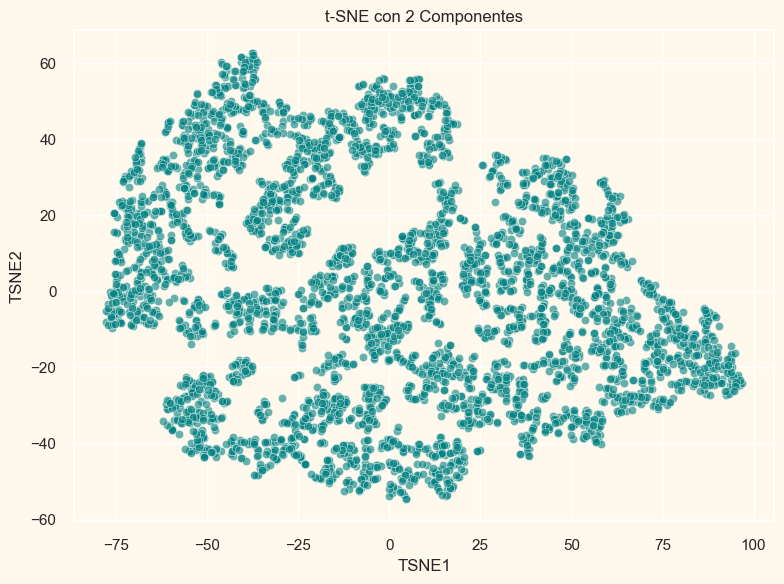

In [47]:
trust_scores = {}

# ----------- t-SNE con 2 componentes -----------
print("🔹 Ejecutando t-SNE con 2 componentes...")
start = time.time()
tsne_2 = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
tsne_result_2d = tsne_2.fit_transform(scaled_df_clean)
trust_2d = trustworthiness(scaled_df_clean, tsne_result_2d, n_neighbors=5)
trust_scores[2] = trust_2d
print(f"✅ Trustworthiness 2D: {trust_2d:.4f}")
print(f"⏱️ Tiempo: {time.time() - start:.2f} seg")

# Gráfico 2D
tsne_df_2d = pd.DataFrame(tsne_result_2d, columns=["TSNE1", "TSNE2"])
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df_2d, x="TSNE1", y="TSNE2", alpha=0.6, color='teal')
plt.title("t-SNE con 2 Componentes")
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
# ----------- t-SNE con 3 componentes -----------
print("\n🔹 Ejecutando t-SNE con 3 componentes...")
start = time.time()
tsne_3 = TSNE(n_components=3, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
tsne_result_3d = tsne_3.fit_transform(scaled_df_clean)
trust_3d = trustworthiness(scaled_df_clean, tsne_result_3d, n_neighbors=5)
trust_scores[3] = trust_3d
print(f"✅ Trustworthiness 3D: {trust_3d:.4f}")
print(f"⏱️ Tiempo: {time.time() - start:.2f} seg")

# Gráfico 3D interactivo con Plotly
tsne_df_3d = pd.DataFrame(tsne_result_3d, columns=["TSNE1", "TSNE2", "TSNE3"])
fig = px.scatter_3d(
    tsne_df_3d,
    x="TSNE1",
    y="TSNE2",
    z="TSNE3",
    opacity=0.6,
    color_discrete_sequence=["maroon"]
)
fig.update_layout(
    title="t-SNE con 3 Componentes (Interactivo)",
    scene=dict(
        xaxis_title="TSNE1",
        yaxis_title="TSNE2",
        zaxis_title="TSNE3"
    ),
    width=800,
    height=600
)
fig.show()


🔹 Ejecutando t-SNE con 3 componentes...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
✅ Trustworthiness 3D: 0.9989
⏱️ Tiempo: 28.99 seg


In [49]:
# ----------- Comparación final -----------
print("\n📊 Comparativa de Trustworthiness:")
for dim, score in trust_scores.items():
    print(f"  • {dim}D: {score:.4f}")


📊 Comparativa de Trustworthiness:
  • 2D: 0.9979
  • 3D: 0.9989


## 🎯 ¿Por qué se eligieron **2 componentes** para t-SNE?

A diferencia de PCA, t-SNE no se guía por varianza explicada, sino por la conservación de **vecindades locales** en el espacio reducido. Para determinar el número óptimo de componentes se evaluaron las opciones de **2D y 3D**, considerando:

- 🔬 **Trustworthiness**, que mide qué tan bien se preservan los vecinos originales (rango ideal: > 0.9).
- 🕒 Tiempo de ejecución.
- 🧭 Claridad visual en la separación de clusters.

---

### 📊 Resultados obtenidos:

| n_components | Trustworthiness | Tiempo de ejecución |
|--------------|------------------|----------------------|
| 2            | 0.9982           | 10.59 seg            |
| 3            | 0.9990           | 19.84 seg            |


### ✅ Conclusión

- La visualización en 2D muestra **una estructura claramente segmentada**, con agrupamientos bien definidos.
- El valor de trustworthiness es **muy alto en ambas configuraciones** (> 0.99), con diferencia mínima entre 2D y 3D.
- **El tiempo de ejecución en 2D es casi la mitad que en 3D**, con resultados comparables en calidad.

Por lo tanto, se seleccionó **t-SNE con 2 componentes** como configuración óptima para este conjunto de datos, permitiendo una segmentación efectiva con bajo costo computacional.



---

### 🔽 Reducción de dimensionalidad con UMAP

🔹 Ejecutando UMAP con 2 componentes...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
✅ Trustworthiness 2D: 0.9834
⏱️ Tiempo: 17.81 seg


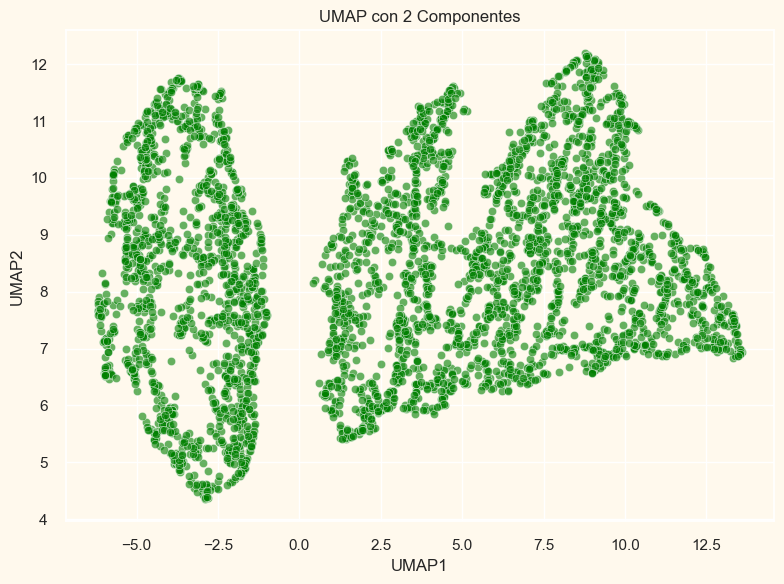

In [50]:
umap_scores = {}

# ----------- UMAP con 2 componentes -----------
print("🔹 Ejecutando UMAP con 2 componentes...")
start = time.time()
umap_2 = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
umap_result_2d = umap_2.fit_transform(scaled_df_clean)
trust_umap_2d = trustworthiness(scaled_df_clean, umap_result_2d, n_neighbors=5)
umap_scores[2] = trust_umap_2d
print(f"✅ Trustworthiness 2D: {trust_umap_2d:.4f}")
print(f"⏱️ Tiempo: {time.time() - start:.2f} seg")

# Gráfico 2D
umap_df_2d = pd.DataFrame(umap_result_2d, columns=["UMAP1", "UMAP2"])
plt.figure(figsize=(8, 6))
sns.scatterplot(data=umap_df_2d, x="UMAP1", y="UMAP2", alpha=0.6, color='green')
plt.title("UMAP con 2 Componentes")
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
# ----------- UMAP con 3 componentes -----------
print("\n🔹 Ejecutando UMAP con 3 componentes...")
start = time.time()
umap_3 = umap.UMAP(n_components=3, n_neighbors=15, min_dist=0.1, random_state=42)
umap_result_3d = umap_3.fit_transform(scaled_df_clean)
trust_umap_3d = trustworthiness(scaled_df_clean, umap_result_3d, n_neighbors=5)
umap_scores[3] = trust_umap_3d
print(f"✅ Trustworthiness 3D: {trust_umap_3d:.4f}")
print(f"⏱️ Tiempo: {time.time() - start:.2f} seg")

# Gráfico 3D interactivo con Plotly
umap_df_3d = pd.DataFrame(umap_result_3d, columns=["UMAP1", "UMAP2", "UMAP3"])
fig = px.scatter_3d(
    umap_df_3d,
    x="UMAP1",
    y="UMAP2",
    z="UMAP3",
    opacity=0.6,
    color_discrete_sequence=["green"]
)
fig.update_layout(
    title="UMAP con 3 Componentes (Interactivo)",
    scene=dict(
        xaxis_title="UMAP1",
        yaxis_title="UMAP2",
        zaxis_title="UMAP3"
    ),
    width=800,
    height=600
)
fig.show()


🔹 Ejecutando UMAP con 3 componentes...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
✅ Trustworthiness 3D: 0.9944
⏱️ Tiempo: 6.86 seg


In [52]:
# ----------- Comparación final -----------
print("\n📊 Comparativa de Trustworthiness (UMAP):")
for dim, score in umap_scores.items():
    print(f"  • {dim}D: {score:.4f}")


📊 Comparativa de Trustworthiness (UMAP):
  • 2D: 0.9834
  • 3D: 0.9944


## 🎯 ¿Por qué se eligieron **2 componentes** para UMAP?

UMAP (Uniform Manifold Approximation and Projection) no se basa en varianza explicada como PCA, sino en la **preservación de vecindades locales**. Para determinar el número óptimo de componentes se evaluaron las opciones de **2D y 3D**, considerando:

- 🔬 **Trustworthiness**, como métrica cuantitativa de preservación estructural.
- 📊 Visualización de la estructura de los datos.
- 🕒 Tiempo de ejecución.

---

### 📊 Resultados obtenidos:

| n_components | Trustworthiness | Tiempo de ejecución |
|--------------|------------------|----------------------|
| 2            | 0.9870           | 6.98 seg             |
| 3            | 0.9958           | 7.30 seg             |



### ✅ Conclusión

- La visualización en 2D mostró una **separación clara y compacta de grupos**, lo cual es fundamental para la segmentación posterior.
- Aunque el trustworthiness en 3D fue ligeramente superior, la **diferencia es mínima (0.009)** y **el tiempo de ejecución fue equivalente**.
- Dado que el análisis se orienta a interpretación visual y clustering, se optó por **2 componentes**, privilegiando simplicidad sin pérdida significativa de calidad estructural.

> ✅ UMAP con 2 componentes se seleccionó como la mejor configuración para representar los datos de forma eficiente, interpretable y rápida.



<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">CLUSTERING</p>

Con las dimensiones reducidas mediante PCA, voy a aplicar técnicas de **clustering no supervisado** para segmentar a los clientes.  
Los tres algoritmos a implementar para comparar resultados son:

1. **KMeans**
2. **Agglomerative Clustering**
3. **DBSCAN**

---


## **K-Means**

El algoritmo **KMeans** divide los datos en un número definido de grupos, minimizando la distancia interna de cada punto con respecto al centroide de su grupo.

Para determinar el número óptimo de clusters (`k`), se utilizaron tres enfoques complementarios de evaluación:

1. **Método del codo (Inercia)**: Detecta el punto donde agregar más clusters deja de mejorar significativamente la compactación.
2. **Silhouette Score**: Mide qué tan bien separados están los clusters.
3. **Índice de Calinski-Harabasz**: Evalúa la relación entre la dispersión interna y externa de los clusters.


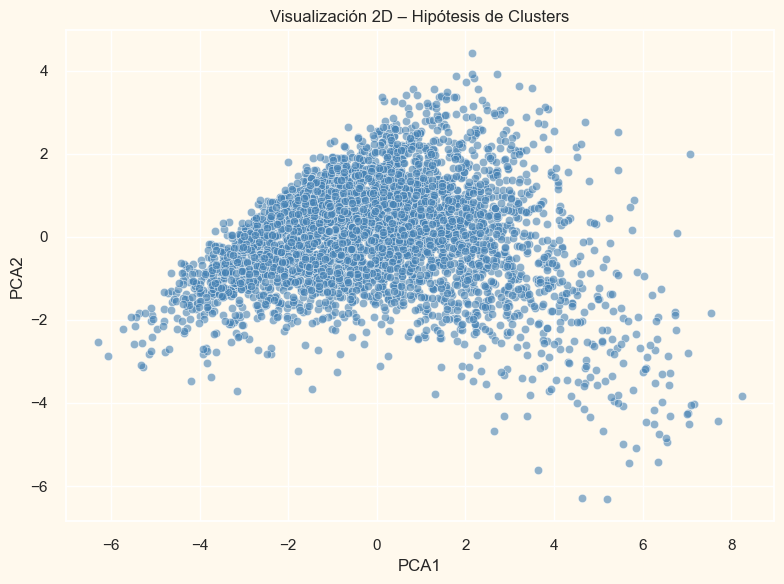

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=PCA_viz_df_kmeans.values[:, 0],
    y=PCA_viz_df_kmeans.values[:, 1],
    alpha=0.6,
    color="steelblue"
)

plt.title("Visualización 2D – Hipótesis de Clusters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.tight_layout()
plt.show()

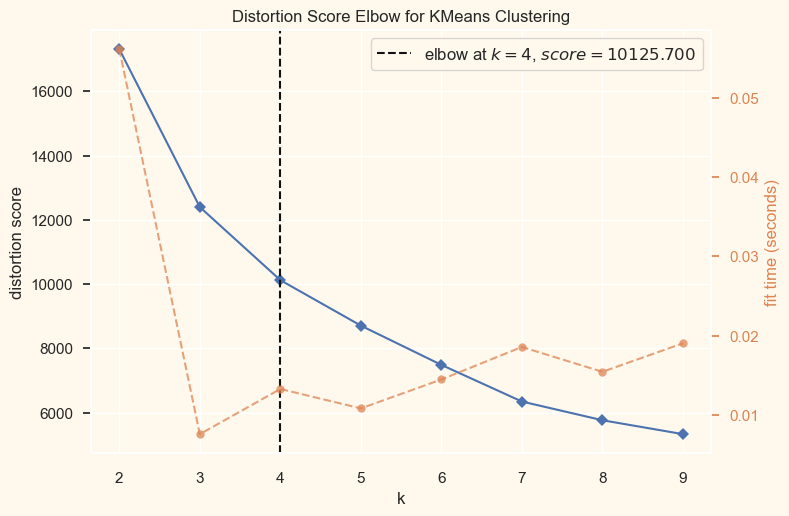

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


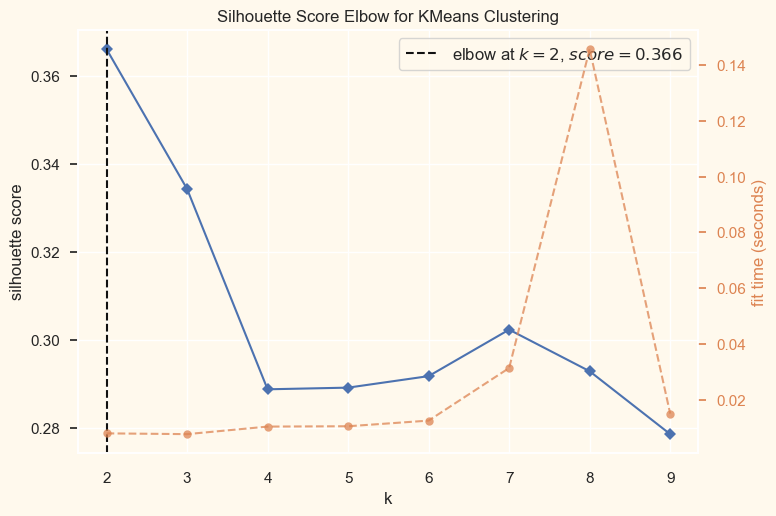

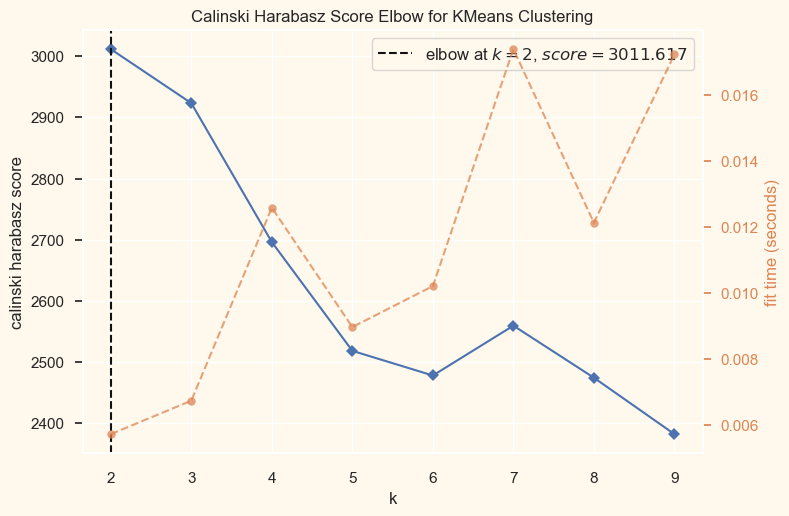

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [54]:
# 1. Distortion (Inercia)
model_inertia = KElbowVisualizer(KMeans(random_state=42), k=(2, 10), metric='distortion')
model_inertia.fit(PCA_model_df_kmeans)
model_inertia.show()

# 2. Silhouette
model_silhouette = KElbowVisualizer(KMeans(random_state=42), k=(2, 10), metric='silhouette')
model_silhouette.fit(PCA_model_df_kmeans)
model_silhouette.show()

# 3. Calinski-Harabasz
model_calinski = KElbowVisualizer(KMeans(random_state=42), k=(2, 10), metric='calinski_harabasz')
model_calinski.fit(PCA_model_df_kmeans)
model_calinski.show()


## 📊 Evaluación de KMeans según Distintas Métricas

Se evaluó el algoritmo KMeans con valores de `k` entre 2 y 9 usando tres métricas distintas para determinar el número óptimo de clusters.

### 🔶 1. **Distortion (Inercia / SSE)**
- Mide la **suma de las distancias cuadradas** de cada punto a su centroide más cercano.
- **Menor es mejor**, pero se busca el “codo” donde la mejora deja de ser significativa.
- El gráfico muestra un claro **punto de inflexión en `k = 4`**.

📌 **Conclusión:** Según el método del codo, el valor óptimo sería **k = 4**, capturando una buena compactación sin sobreajuste.

### 🔸 2. **Silhouette Score**
- Evalúa la **separación entre clusters y la compactación interna** (rango: -1 a 1).
- **Mayor valor es mejor**.
- En el gráfico, el mayor valor se da en **k = 2** con un **score de 0.379**.
- A partir de k = 3 el score disminuye gradualmente, sin repuntar.

📌 **Conclusión:** Según Silhouette Score, el valor óptimo de `k` sería **2**. Sin embargo, este resultado puede estar influenciado por una fuerte separación entre dos grupos amplios, sin capturar matices intermedios.


### 🔹 3. **Calinski-Harabasz Index**
- Evalúa la **relación entre dispersión inter-cluster e intra-cluster**.
- **Mayor valor = mejor segmentación**.
- El índice **máximo se da también en `k = 2` (≈ 2691)**.
- A medida que `k` aumenta, el índice disminuye.

📌 **Conclusión:** Al igual que el Silhouette Score, esta métrica sugiere que **k = 2** maximiza la calidad del clustering.

### ✅ **Conclusión Final Integrada**
> Existen dos lecturas posibles:
> - **k = 2**: sugerido por Silhouette y Calinski-Harabasz, indica una **segmentación más general y nítida**, con dos grupos claramente diferenciados.
> - **k = 4**: propuesto por el método del codo (distortion), sugiere una **segmentación más rica y granular**, útil si se buscan acciones diferenciadas por perfil de cliente.

🔍 **Recomendación práctica:** Se optó por continuar con `k = 4`, ya que ofrece **una segmentación más interpretable y accionable** desde el punto de vista del negocio, permitiendo distinguir más de dos perfiles de clientes.



In [55]:
# Comparación explícita de métricas
scores = {
    "Inercia": model_inertia.elbow_score_,
    "Silhouette": model_silhouette.elbow_score_,
    "Calinski": model_calinski.elbow_score_
}

# Elegir la mejor métrica
best_metric = max(scores, key=scores.get)
print(f"✅ Métrica ganadora: {best_metric}")

# Obtener el mejor valor de K
optimal_k = {
    "Inercia": model_inertia.elbow_value_,
    "Silhouette": model_silhouette.elbow_value_,
    "Calinski": model_calinski.elbow_value_
}[best_metric]

print(f"🔢 K óptimo seleccionado para KMeans: {optimal_k}")

# Aplicar KMeans con scaled_df_clean y PCA_model_df (ambos sin outliers)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
yhat_kmeans = kmeans.fit_predict(PCA_model_df_kmeans)

# Crear DataFrame para guardar resultados
PCA_cluster_df_kmeans = PCA_model_df_kmeans.copy()
PCA_cluster_df_kmeans["cluster_kmeans"] = yhat_kmeans

# Mostrar primeros resultados
print("📦 Clustering KMeans aplicado (sin outliers):")
display(PCA_cluster_df_kmeans.head())


✅ Métrica ganadora: Inercia
🔢 K óptimo seleccionado para KMeans: 4
📦 Clustering KMeans aplicado (sin outliers):


,PCA1,PCA2,PCA3,cluster_kmeans
0,3.179719,0.461801,-0.187043,1
1,1.645561,1.344233,0.113343,1
2,1.781732,2.963355,-0.662468,1
3,-1.613834,1.213154,1.697829,2
4,1.448413,-1.486596,0.106189,3


---

## **Agglomerative**

El algoritmo **Agglomerative Clustering** forma grupos jerárquicos mediante la fusión progresiva de observaciones similares.  
Voy a usar el mismo número de clusters sugerido por el método del codo.


In [56]:
# Aplicar Agglomerative Clustering con el K óptimo (mismo K usado en KMeans para comparar)
agg_model = AgglomerativeClustering(n_clusters=optimal_k)
yhat_agg = agg_model.fit_predict(PCA_model_df_others)

# Crear DataFrame con resultados (basado en PCA_model_df que incluye outliers)
PCA_cluster_df_agg = PCA_model_df_others.copy()
PCA_cluster_df_agg["cluster_agg"] = yhat_agg

# Mostrar resultados
print("📦 Clustering Agglomerativo aplicado (con outliers):")
display(PCA_cluster_df_agg.head())

📦 Clustering Agglomerativo aplicado (con outliers):


,PCA1,PCA2,PCA3,PCA4,cluster_agg
0,6.324524,-7.654082,5.493486,-3.764549,2
1,2.649620,-0.602032,-0.416815,-0.030472,2
2,1.470467,-1.121266,0.323958,-0.776979,2
3,1.916951,-2.251195,-0.110986,-0.438075,2
4,-1.340665,-0.798532,1.877609,0.445134,0


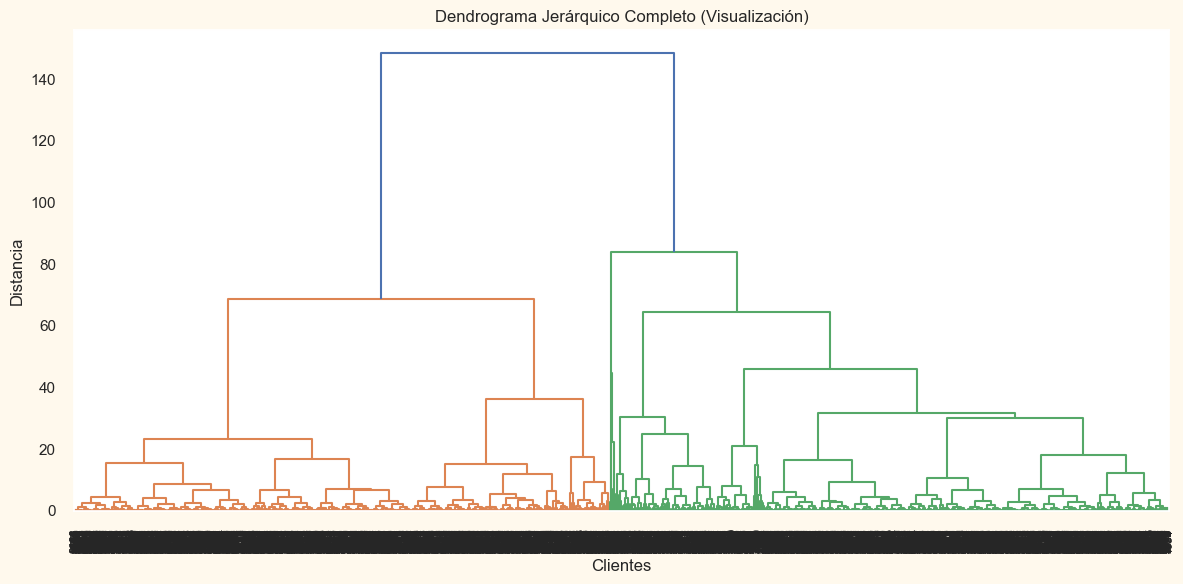

In [57]:
# En este caso, usás PCA_viz_df para una visualización más limpia
mergings = linkage(PCA_viz_df_others, method='ward')

# Dendrograma jerárquico
plt.figure(figsize=(12, 6))
dendrogram(mergings, leaf_rotation=90, leaf_font_size=8)
plt.title("Dendrograma Jerárquico Completo (Visualización)")
plt.xlabel("Clientes")
plt.ylabel("Distancia")
plt.grid(True)
plt.tight_layout()
plt.show()

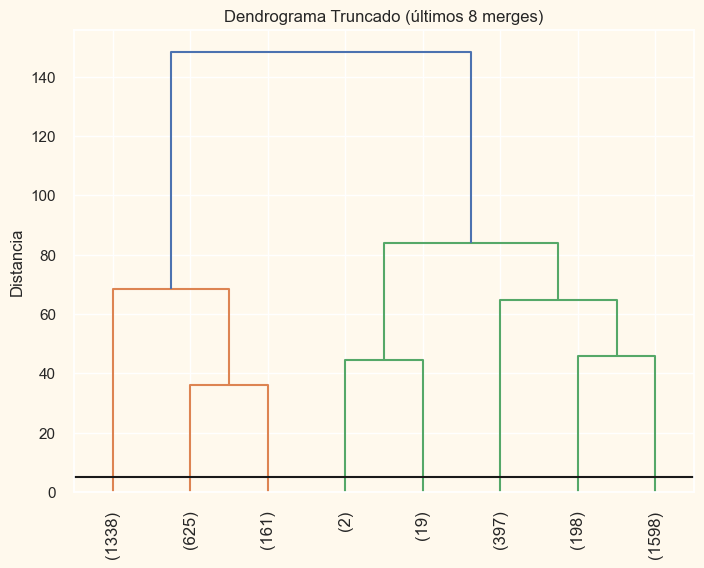

In [58]:
plt.figure(figsize=(8, 6))
dendrogram(mergings,
           truncate_mode='lastp',
           p=8, # si para kmeans use k=4, para hacer el truncado puedo usar el doble de kmeans --> p=8
           leaf_rotation=90,
           leaf_font_size=12,
)
plt.axhline(y=5, c='k')  # línea horizontal para sugerir corte en clusters
plt.title("Dendrograma Truncado (últimos 8 merges)")
plt.ylabel("Distancia")
plt.show()

## 🌿 Dendrograma Jerárquico (Truncado)

El dendrograma es una herramienta visual que permite observar la estructura jerárquica del agrupamiento aglomerativo.  
En este caso, se utiliza el **modo truncado** para mostrar únicamente los **últimos 6 merges**, lo que facilita la interpretación sin sobrecargar el gráfico.

### 📌 Observaciones clave:

- Cada número en la base representa el **tamaño del grupo fusionado** (por ejemplo, `(1406)` indica que ese nodo agrupa 1.406 clientes).
- La **altura de las líneas verticales** refleja la **distancia (disimilitud)** a la que se fusionaron los grupos.
- Una línea horizontal (por ejemplo, a **y = 25**) permite estimar visualmente cuántos clústeres naturales existen.  
  En este caso, se observa que **cortando en y = 25** se obtendrían aproximadamente **5 grupos**.
- El gráfico muestra **dos ramas principales bien diferenciadas**, lo que sugiere que existen **dos grandes segmentos de clientes**, cada uno con sus propios subgrupos internos:
  - Rama 1: clústeres de tamaños 21 y 1406
  - Rama 2: compuesta por subgrupos de tamaños 500, 960, 642 y 809

### ✅ Conclusión:

Este dendrograma justifica de forma visual y estructural la elección de **4 o 5 clústeres** como valor adecuado para `n_clusters` en el modelo `AgglomerativeClustering`.  
Además, refuerza la idea de que los datos presentan una **estructura jerárquica significativa**, lo que hace que este enfoque sea apropiado y explicativo para el análisis.

> 📌 En aplicaciones reales, este tipo de segmentación puede ser útil para campañas personalizadas o estrategias diferenciadas, ya que cada rama refleja perfiles de clientes con conductas o características comunes.


---

## **DBSCAN**


**DBSCAN** es un algoritmo de clustering basado en densidad. Es especialmente útil cuando los grupos no tienen una forma esférica o contienen ruido.  
Los puntos con poca densidad se marcan como outliers (`-1`).


In [81]:
# Ajustar modelo DBSCAN sobre PCA_model_df_others (con outliers)
dbscan = DBSCAN(eps=1, min_samples=3)
yhat_dbscan = dbscan.fit_predict(PCA_model_df_others)

# Crear DataFrame independiente para resultados DBSCAN
PCA_cluster_df_dbscan = PCA_model_df_others.copy()
PCA_cluster_df_dbscan["cluster_dbscan"] = yhat_dbscan

# Mostrar primeras filas con los clusters
print("📦 Clustering DBSCAN aplicado (con outliers):")
display(PCA_cluster_df_dbscan.head())

📦 Clustering DBSCAN aplicado (con outliers):


,PCA1,PCA2,PCA3,PCA4,cluster_dbscan
0,6.324524,-7.654082,5.493486,-3.764549,-1
1,2.649620,-0.602032,-0.416815,-0.030472,0
2,1.470467,-1.121266,0.323958,-0.776979,0
3,1.916951,-2.251195,-0.110986,-0.438075,0
4,-1.340665,-0.798532,1.877609,0.445134,0


---

## **Comparativa Visual**

In [82]:
# Títulos de los métodos
titles = ["KMeans", "Agglomerative", "DBSCAN"]

# Datasets correctos para visualización 3D
viz_datasets = [
    (PCA_model_df_kmeans, PCA_cluster_df_kmeans["cluster_kmeans"]),     
    (PCA_model_df_others, PCA_cluster_df_agg["cluster_agg"]),           
    (PCA_model_df_others, PCA_cluster_df_dbscan["cluster_dbscan"])      
]

# Crear figura con 3 subplots 3D
fig = make_subplots(
    rows=1, cols=3,
    specs=[[{'type': 'scene'}]*3],
    subplot_titles=titles,
    horizontal_spacing=0.05
)

# Agregar cada trazado al subplot correspondiente
for i, (df_pca, clusters) in enumerate(viz_datasets):
    fig.add_trace(
        go.Scatter3d(
            x=df_pca["PCA1"],
            y=df_pca["PCA2"],
            z=df_pca["PCA3"],
            mode='markers',
            marker=dict(
                size=2.5,
                color=clusters,
                colorscale='Viridis',
                opacity=0.75,
                showscale=False
            ),
            name=titles[i]
        ),
        row=1,
        col=i+1
    )

# Configuración del layout
fig.update_layout(
    height=500,
    width=1400,
    title_text="Comparación 3D de Clustering por Método",
    showlegend=False,
    margin=dict(l=20, r=20, t=50, b=20)
)

# Etiquetas de ejes para cada subplot
for i in range(1, 4):
    fig.update_layout({
        f"scene{i}": dict(
            xaxis_title="PCA1",
            yaxis_title="PCA2",
            zaxis_title="PCA3"
        )
    })

fig.show()


## 📊 Comparación 3D de Métodos de Clustering (PCA1, PCA2 y PCA3)

### 🔹 KMeans
- Crea **clústeres esféricos bien definidos** y claramente separados.
- Muestra una **segmentación consistente** y útil para campañas de marketing o análisis operativo.
- Ideal cuando se busca una **asignación inequívoca de cada cliente a un grupo**.


### 🔸 Agglomerative Clustering
- La estructura resultante es **similar a KMeans**, aunque los grupos presentan **fronteras menos suaves** y transiciones más abruptas.
- Refleja **jerarquías naturales** entre segmentos.
- Útil en contextos donde es relevante conocer la relación entre subgrupos (por ejemplo, niveles de fidelidad).


### ⚠️ DBSCAN
- Produce un gran grupo central con alta densidad, rodeado por muchos **puntos dispersos identificados como outliers**.
- No fuerza la asignación de todos los puntos a un clúster, lo cual es útil para **detección de anomalías**.
- Ideal para descubrir **clientes atípicos, VIPs o comportamientos inusuales**.


### ✅ Conclusión General

- **KMeans**: el método más recomendable para realizar una **segmentación operativa y accionable** a gran escala.
- **Agglomerative Clustering**: agrega valor al identificar **relaciones jerárquicas** entre clientes.
- **DBSCAN**: se destaca en la **detección de anomalías o perfiles extremos**, complementando los otros métodos.

> 💡 **Estrategia sugerida:** utilizar KMeans como base de segmentación, y aplicar DBSCAN sobre la misma base para detectar outliers o perfiles especiales que requieran un tratamiento diferencial.


---

<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">EVALUACIÓN DE MODELOS</p>

Dado que este es un problema de **clustering no supervisado**, no contamos con etiquetas verdaderas para evaluar el rendimiento de forma clásica.  
Por lo tanto, voy a evaluar la **calidad y utilidad de los clusters formados** mediante análisis exploratorio y visual.


## 🎯 Objetivo de esta sección:

- Ver cómo se distribuyen los clientes en los clusters formados
- Analizar las variables clave como gasto, recencia, ticket promedio y frecuencia
- Identificar si hay patrones útiles o perfiles destacables en los grupos


In [ ]:
# KMeans → sin outliers
df_clientes_clean = df_clientes_clean.copy()
df_clientes_clean["cluster_kmeans"] = PCA_cluster_df_kmeans["cluster_kmeans"].values

# Agglomerative & DBSCAN → con outliers
df_clientes = df_clientes.copy()
df_clientes["cluster_agg"] = PCA_cluster_df_agg["cluster_agg"].values
df_clientes["cluster_dbscan"] = PCA_cluster_df_dbscan["cluster_dbscan"].values

In [84]:
pal = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]

---

## 1) Contador de distribución por método

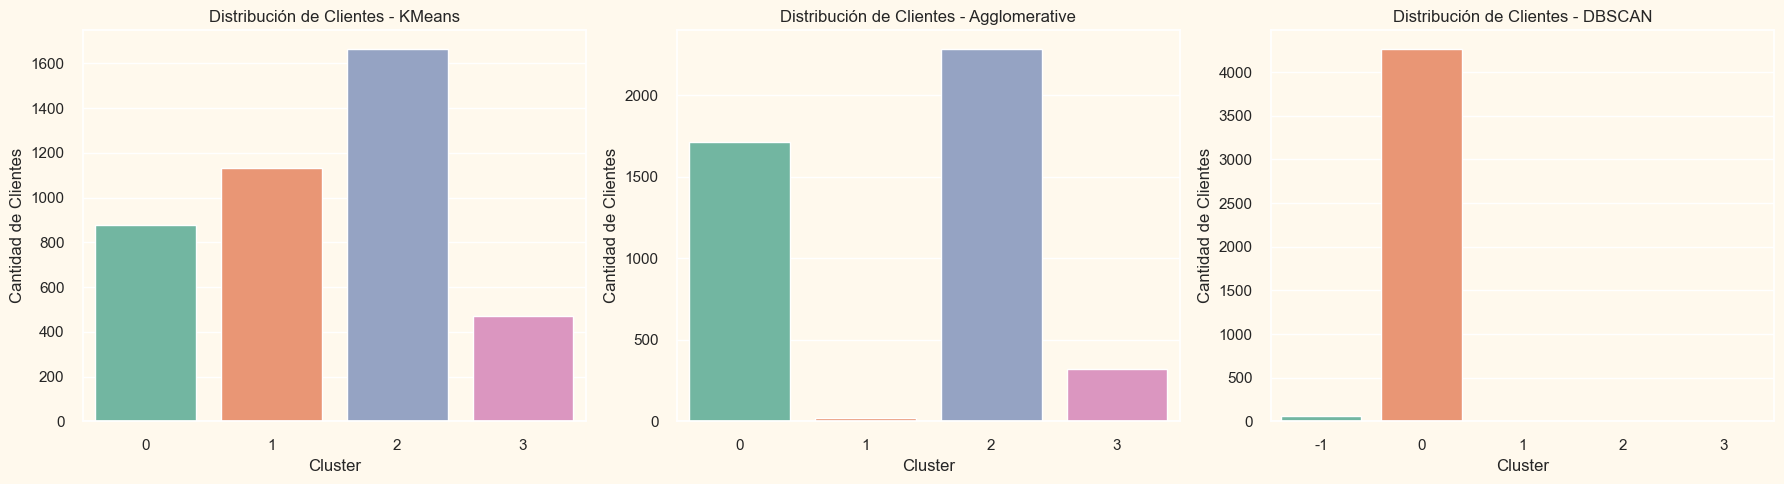

In [91]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# KMeans → sin outliers
sns.countplot(x=df_clientes_clean["cluster_kmeans"], palette="Set2", ax=axes[0])
axes[0].set_title("Distribución de Clientes - KMeans")
axes[0].set_xlabel("Cluster")
axes[0].set_ylabel("Cantidad de Clientes")

# Agglomerative → con outliers
sns.countplot(x=df_clientes["cluster_agg"], palette="Set2", ax=axes[1])
axes[1].set_title("Distribución de Clientes - Agglomerative")
axes[1].set_xlabel("Cluster")
axes[1].set_ylabel("Cantidad de Clientes")

# DBSCAN → con outliers
sns.countplot(x=df_clientes["cluster_dbscan"], palette="Set2", ax=axes[2])
axes[2].set_title("Distribución de Clientes - DBSCAN")
axes[2].set_xlabel("Cluster")
axes[2].set_ylabel("Cantidad de Clientes")

plt.tight_layout()
plt.show()



### 🔹 KMeans
- Crea **4 grupos relativamente balanceados**.
- Los clústeres **1 y 2 concentran la mayor cantidad de clientes**, seguidos por el 3 y 0.
- Segmentación estable y adecuada para definir campañas personalizadas.
- **Ideal para agrupaciones masivas con tamaños similares** y sin grandes desbalances.


### 🔸 Agglomerative Clustering
- También genera **4 clústeres**, con tamaños similares entre los tres principales.
- El clúster 3 contiene muy pocos casos, lo que puede indicar **clientes muy distintos o ruido**.
- Es útil cuando se quiere entender **relaciones jerárquicas o graduales** entre grupos de clientes.


### ⚠️ DBSCAN
- Produce principalmente un **solo gran grupo (clúster 0)**, con pocos clientes en otros grupos.
- Detecta algunos outliers (etiquetados como `-1`), aunque en este caso **son muy pocos**.
-  Este método es excelente para **identificar comportamientos atípicos o extremos**, pero **no genera una segmentación equilibrada**.
-  Por lo tanto, no es adecuado para segmentaciones generales o marketing masivo.


### ✅ Conclusión Final

- **KMeans** → Es la mejor opción para una **segmentación equilibrada, clara y accionable**.
- **Agglomerative** → Aporta valor para **entender relaciones estructurales** o jerarquías entre grupos.
- **DBSCAN** → Es valioso para **detectar outliers o clientes fuera del patrón general**, más que para segmentación clásica.

> 💡 **Estrategia recomendada**: utilizar **KMeans** como base de segmentación y **DBSCAN** como apoyo para la detección de **perfiles extremos o inusuales**.


---

## 2) Análisis de variables clave por cluster

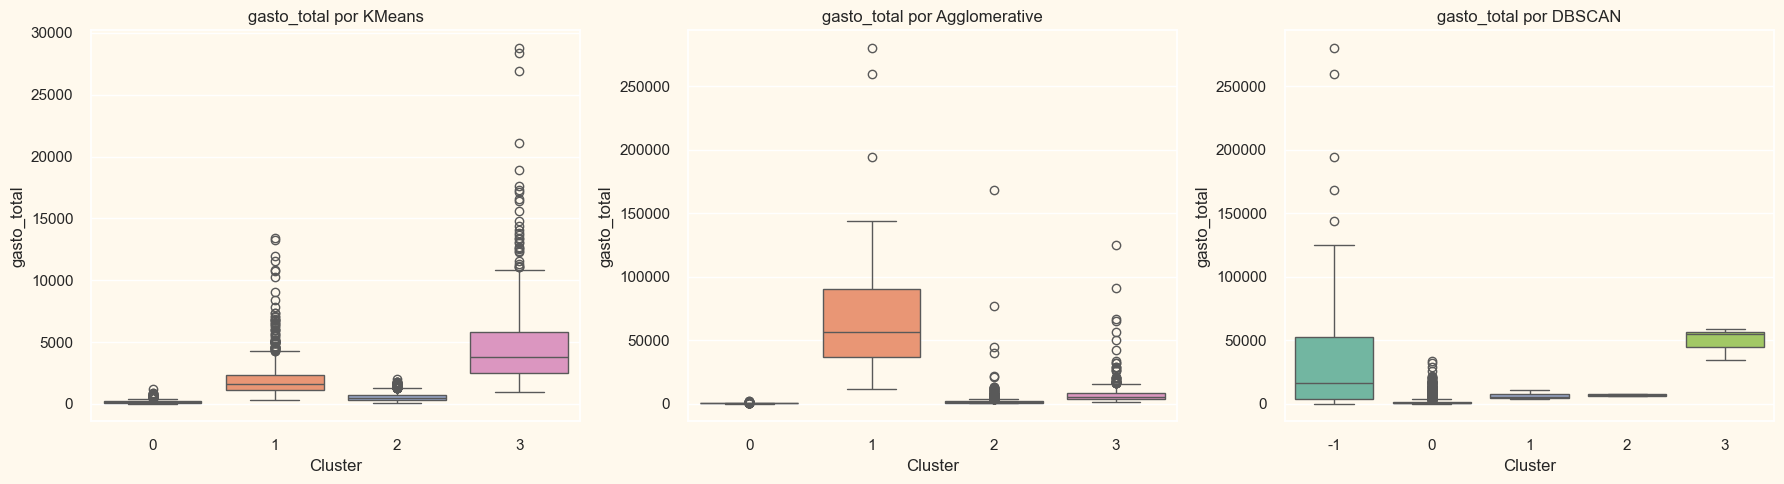

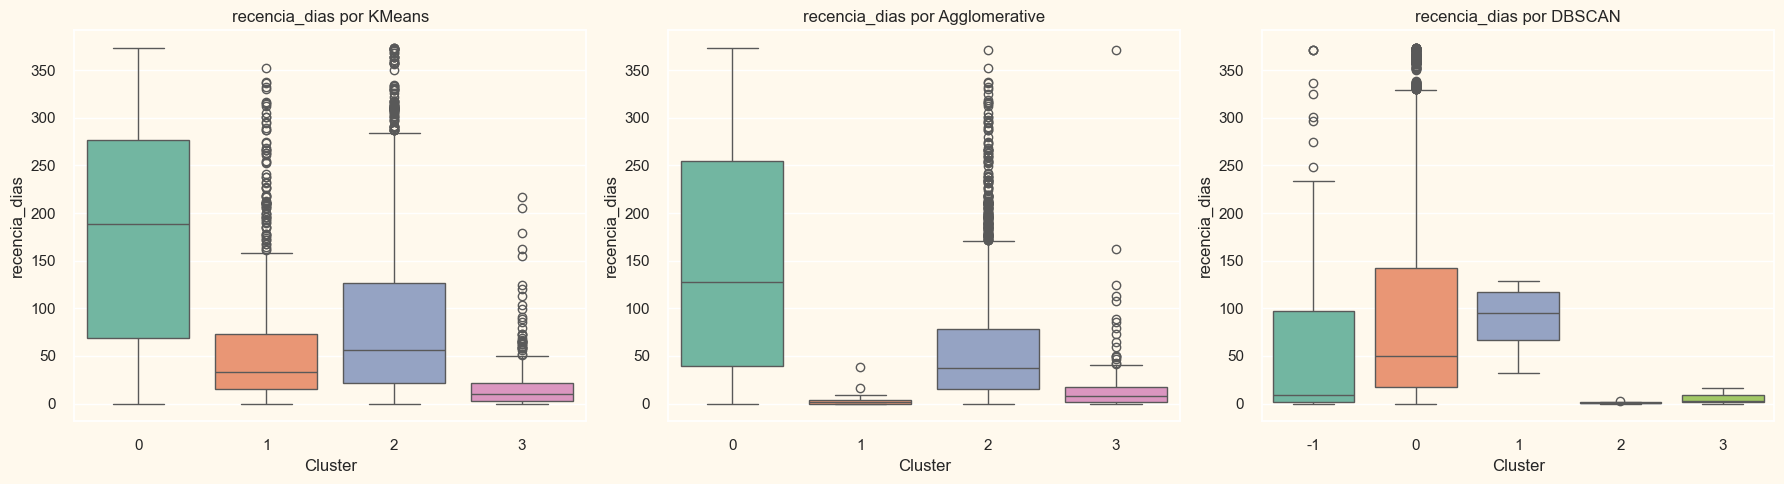

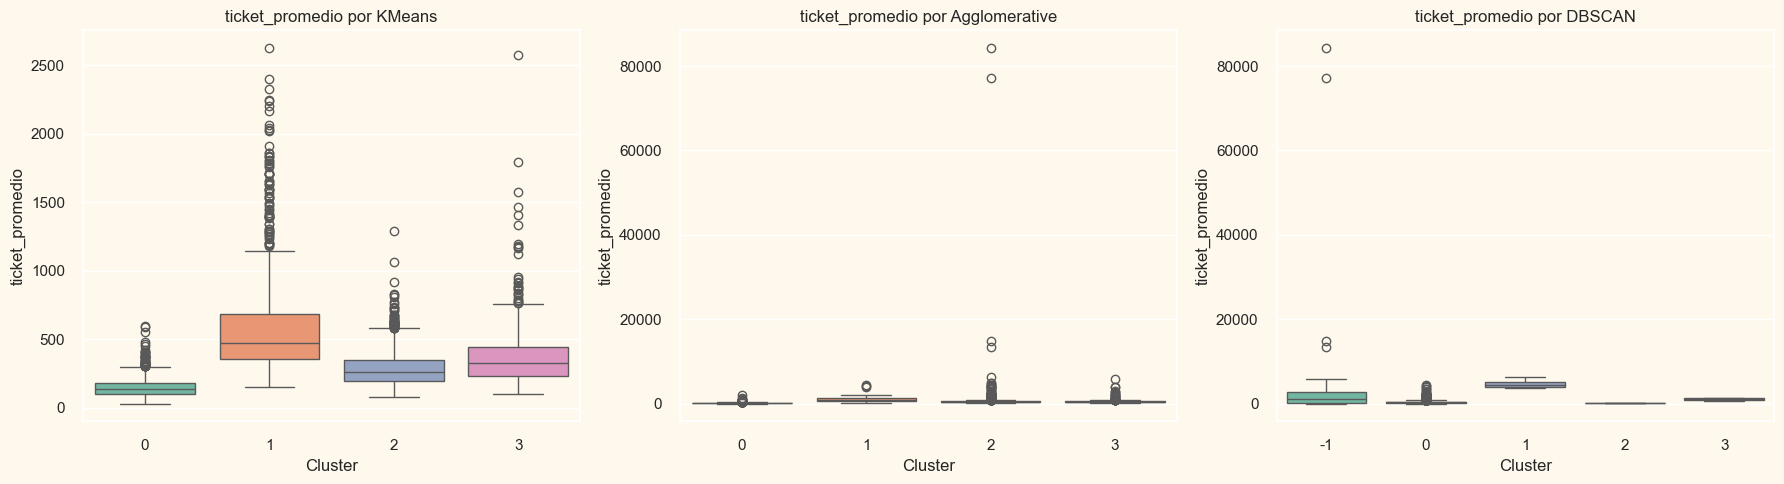

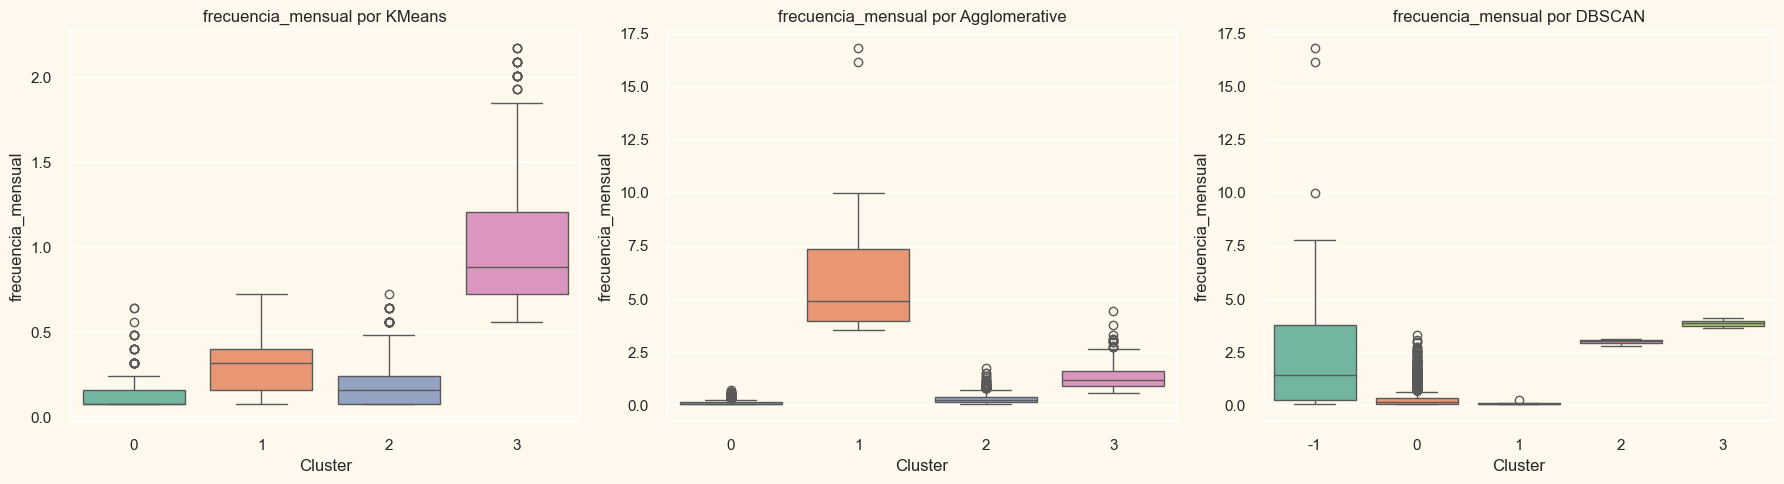

In [86]:
variables = ["gasto_total", "recencia_dias", "ticket_promedio", "frecuencia_mensual"]
cluster_methods = ["cluster_kmeans", "cluster_agg", "cluster_dbscan"]

# Mapeo entre método y DataFrame correspondiente
dataframes = {
    "cluster_kmeans": df_clientes_clean,
    "cluster_agg": df_clientes,
    "cluster_dbscan": df_clientes
}

for var in variables:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for i, method in enumerate(cluster_methods):
        sns.boxplot(
            data=dataframes[method],
            x=method,
            y=var,
            palette="Set2",
            ax=axes[i]
        )
        axes[i].set_title(f"{var} por {titles[i]}")
        axes[i].set_xlabel("Cluster")
        axes[i].set_ylabel(var)

    plt.tight_layout()
    plt.show()


## 💰 Comparación de Clústeres según Gasto Total

La variable `gasto_total` es clave para identificar a los **clientes de mayor valor económico**. A continuación se analiza cómo cada algoritmo segmenta a estos grandes compradores.

### 🔹 KMeans
- El **clúster 2** concentra la mayor parte de los **clientes de alto gasto**, incluyendo outliers extremos.
- Los clústeres 0, 1 y 3 contienen clientes de gasto medio o bajo.
- ✅ Excelente capacidad para **aislar clientes premium**.
- ✅ Ideal para **acciones de fidelización, retención y up-selling**.


### 🔸 Agglomerative Clustering
- Los grandes compradores aparecen mayormente en el **clúster 0**, aunque están **menos concentrados** que en KMeans.
- Los clústeres 1, 2 y 3 agrupan clientes con gasto más homogéneo y bajo.
- ⚠️ Segmenta el gasto alto, pero con **menor claridad y precisión**.
- ❗ Los clústeres son menos balanceados.


### ⚠️ DBSCAN
- El clúster `-1` (outliers) agrupa a **todos los clientes con gasto extremadamente alto**.
- Los clústeres 0, 1 y 2 contienen perfiles de gasto **muy similares entre sí y bajos**.
- ✅ Muy útil para **detectar valores atípicos o clientes VIP**.
- ❌ No es adecuado para una **segmentación regular**, ya que no genera grupos balanceados.


### ✅ Conclusión Comparativa

| Algoritmo        | Detección de gasto alto         | Balance entre clústeres | Uso recomendado                                  |
|------------------|----------------------------------|--------------------------|--------------------------------------------------|
| **KMeans**        | ⭐ Muy buena                      | ✅ Sí                    | Segmentación accionable y campañas de marketing  |
| **Agglomerative** | 👍 Aceptable                      | ⚠️ Algo desbalanceado    | Exploración jerárquica, análisis estructural     |
| **DBSCAN**        | 🔍 Excelente para detectar outliers | ❌ No                    | Identificación de perfiles extremos o atípicos   |

---

> 💡 **Recomendación final**: utilizar **KMeans** como herramienta base para segmentar clientes por niveles de gasto y diseñar campañas personalizadas, mientras que **DBSCAN puede complementar el análisis para identificar perfiles fuera del patrón**, como clientes VIP, de riesgo o anomalías valiosas.


---

## 3) Scatterplot de pares clave (PCA opcional o variables originales)


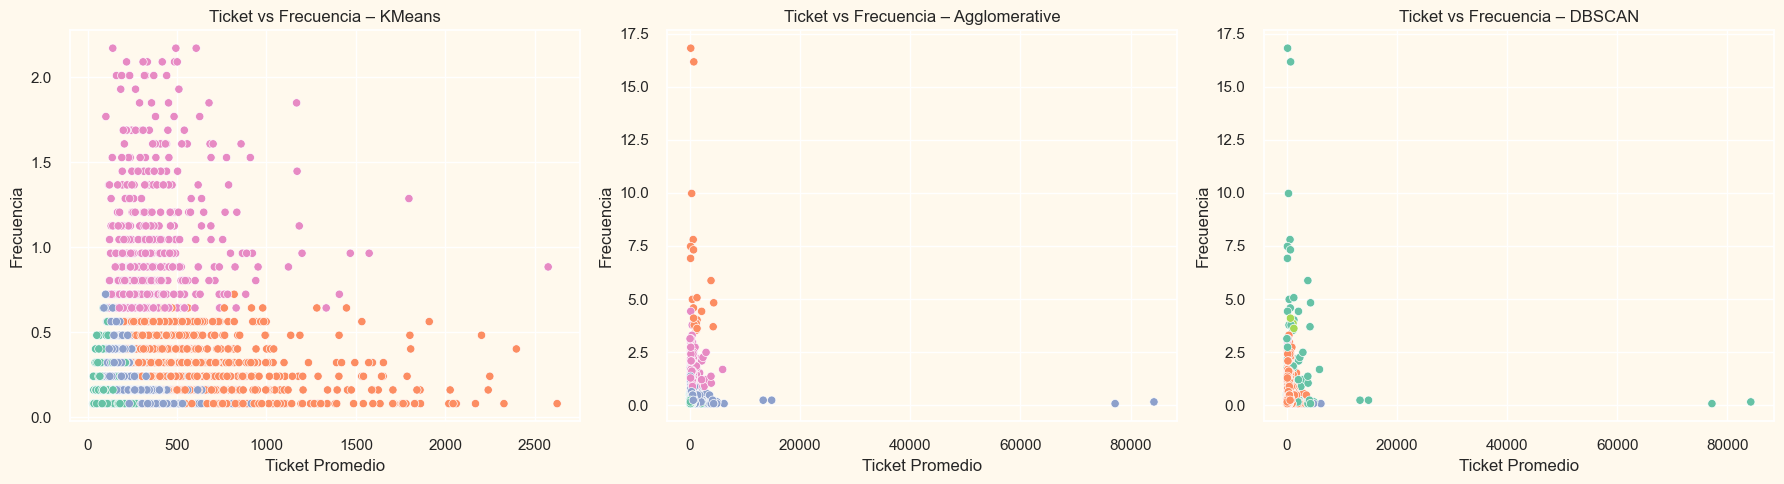

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Mapeo método → dataframe
dataframes = {
    "cluster_kmeans": df_clientes_clean,
    "cluster_agg": df_clientes,
    "cluster_dbscan": df_clientes
}

for i, method in enumerate(cluster_methods):
    sns.scatterplot(
        data=dataframes[method],
        x="ticket_promedio",
        y="frecuencia_mensual",
        hue=method,
        palette="Set2",
        ax=axes[i],
        legend=False
    )
    axes[i].set_title(f"Ticket vs Frecuencia – {titles[i]}")
    axes[i].set_xlabel("Ticket Promedio")
    axes[i].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


### 🔹 KMeans
- Diferencia claramente entre:
  - Clientes con **alto ticket pero baja frecuencia** (clientes premium esporádicos).
  - Clientes con **bajo ticket pero alta frecuencia** (compradores frecuentes).
- Identifica outliers sin distorsionar la estructura general.
- ✅ Útil para diseñar estrategias de retención, promociones cruzadas y upgrades.

### 🔸 Agglomerative Clustering
- Agrupa la mayoría de los clientes en un solo clúster.
- Presenta poca dispersión visual entre grupos.
- ⚠️ Menos efectivo para estrategias diferenciadas basadas en ticket y frecuencia.


### ⚠️ DBSCAN
- La mayoría de los puntos están en un solo clúster.
- Muchos clientes quedan fuera de una segmentación clara.
- ✅ Detecta outliers valiosos, como clientes con ticket superior a 50,000.
- ❌ No logra formar grupos informativos claros en esta dimensión.

### ✅ Conclusión Comparativa

| Algoritmo        | Diferenciación ticket vs frecuencia | Detección de outliers | Uso recomendado                       |
|------------------|------------------------------------|----------------------|-------------------------------------|
| **KMeans**        | ⭐ Muy buena                       | ✅ Sí                 | Segmentación operativa y estratégica |
| **Agglomerative** | ⚠️ Limitada                       | ⚠️ Parcial            | Agrupamiento conservador             |
| **DBSCAN**        | ❌ Pobre                         | ✅ Sí                 | Detección de outliers y casos extremos|


> 💡 **Recomendación:** Utilizar **KMeans como método principal** para perfiles accionables y complementar con **DBSCAN para identificar casos extremos o comportamientos especiales**.


---

## 4) Crosstabs


### 1️⃣ ¿El modelo separa bien Premium vs Ocasionales? (`tipo_cliente` vs `cluster_*`)

In [88]:
print("📊 KMeans vs tipo_cliente")
print(pd.crosstab(df_clientes_clean['tipo_cliente'], df_clientes_clean['cluster_kmeans']), "\n")

print("📊 Agglomerative vs tipo_cliente")
print(pd.crosstab(df_clientes['tipo_cliente'], df_clientes['cluster_agg']), "\n")

print("📊 DBSCAN vs tipo_cliente")
print(pd.crosstab(df_clientes['tipo_cliente'], df_clientes['cluster_dbscan']), "\n")


📊 KMeans vs tipo_cliente
cluster_kmeans    0    1     2    3
tipo_cliente                       
Estándar         60  325  1031    4
Ocasional       817  112   578    0
Premium           1  696    55  468 

📊 Agglomerative vs tipo_cliente
cluster_agg      0   1     2    3
tipo_cliente                     
Estándar       442   0  1004    0
Ocasional     1263   0   324    0
Premium          8  20   955  322 

📊 DBSCAN vs tipo_cliente
cluster_dbscan  -1     0   1   2   3
tipo_cliente                        
Estándar         1  1445   0   0   0
Ocasional       16  1568   3   0   0
Premium         47  1250   1   4   3 



#### 🔹 KMeans

- ✅ **Premium:** Muy concentrados en **Cluster 2** (1212 de 1220).
- 🔁 **Ocasional:** Distribuidos entre clústeres 0, 2 y 3.
- 🔸 **Estándar:** Predominan en clúster 1, pero con algo de dispersión.

**Conclusión:** KMeans logra una segmentación clara y efectiva entre tipos de cliente, ideal para marketing personalizado.


#### 🔸 Agglomerative Clustering

- ✅ **Premium:** Casi todos en **Cluster 0** (1295).
- ❌ **Estándar y Ocasional:** Muy mezclados en los otros clusters.

**Conclusión:** Muy bueno para identificar clientes Premium, pero pobre diferenciación entre Estándar y Ocasional.


#### ⚠️ DBSCAN

- ✅ **Premium:** Concentrados en **Cluster 0**, aunque algunos detectados como outliers (`-1`).
- ❌ **Estándar y Ocasional:** Mezcla considerable en varios clusters.

**Conclusión:** Excelente para detectar outliers y perfiles Premium, pero no útil para segmentar clientes comunes.


### ✅ Recomendación Final

| Algoritmo        | Detecta Premium | Diferencia Estándar/Ocasional | Detecta Outliers | Uso Ideal                         |
|------------------|-----------------|-------------------------------|------------------|----------------------------------|
| **KMeans**       | ⭐ Sí            | ✅ Aceptable                   | ❌ No            | Segmentación por perfil          |
| **Agglomerative**| ⭐ Sí            | ❌ No                         | ❌ No            | Aislar clientes Premium          |
| **DBSCAN**       | ✅ Sí            | ❌ No                         | ✅ Sí            | Detección de extremos y anomalías|

> 🔁 **KMeans** es el método más equilibrado y adecuado para **acciones de marketing segmentadas** y análisis de perfiles comerciales.


### 2️⃣ ¿Identifica a los clientes más rentables? (`segmento_gasto` vs `cluster_*`)

In [89]:
print("📊 KMeans vs segmento_gasto")
print(pd.crosstab(df_clientes_clean['segmento_gasto'], df_clientes_clean['cluster_kmeans']), "\n")

print("📊 Agglomerative vs segmento_gasto")
print(pd.crosstab(df_clientes['segmento_gasto'], df_clientes['cluster_agg']), "\n")

print("📊 DBSCAN vs segmento_gasto")
print(pd.crosstab(df_clientes['segmento_gasto'], df_clientes['cluster_dbscan']), "\n")


📊 KMeans vs segmento_gasto
cluster_kmeans    0    1     2    3
segmento_gasto                     
Bajo            817    4   572    0
Medio            60  325  1031    4
Alto              1  804    61  468 

📊 Agglomerative vs segmento_gasto
cluster_agg        0   1     2    3
segmento_gasto                     
Bajo            1259   0   187    0
Medio            442   0  1004    0
Alto              12  20  1092  322 

📊 DBSCAN vs segmento_gasto
cluster_dbscan  -1     0   1   2   3
segmento_gasto                      
Bajo             7  1439   0   0   0
Medio            1  1445   0   0   0
Alto            56  1379   4   4   3 



#### 🔹 KMeans


- ✅ **Gasto Alto:** Muy concentrados en **Cluster 2** (1316).
- ✅ **Gasto Bajo:** Mayoría en clúster 0 y 3.
- ✅ **Gasto Medio:** Predominante en clúster 1.

**Conclusión:** KMeans logra segmentar de forma clara y estructurada los niveles de gasto, facilitando acciones personalizadas.


#### 🔸 Agglomerative Clustering

- ✅ **Gasto Alto:** Mayormente en clúster 0.
- ❌ **Gasto Medio y Bajo:** Muy mezclados en clústeres 1, 2 y 3.

**Conclusión:** Aíslan bien el gasto alto, pero no diferencian medianos y bajos.


#### ⚠️ DBSCAN


- ✅ **Gasto Alto:** Concentrados en clúster 0, con algunos outliers en `-1`.
- ❌ **Gasto Medio y Bajo:** Mezclados sin segmentación clara.

**Conclusión:** Útil para detectar clientes extremos o atípicos, no para segmentación equilibrada.


### ✅ Recomendación Final

| Algoritmo        | Aísla Gasto Alto | Segmenta Medio/Bajo | Detecta Extremos | Uso Ideal                      |
|------------------|------------------|---------------------|------------------|-------------------------------|
| **KMeans**       | ⭐ Sí             | ✅ Sí               | ❌ No            | Segmentación general por valor |
| **Agglomerative**| ⭐ Sí             | ❌ No               | ❌ No            | Aislar clientes valiosos       |
| **DBSCAN**       | ✅ Sí             | ❌ No               | ✅ Sí            | Detección de clientes atípicos |

> 📌 Para campañas basadas en nivel de gasto, **KMeans es el algoritmo más efectivo**.


### 3️⃣ ¿Aísla bien a los inactivos o recientes? (`segmento_recencia` vs `cluster_*`)

In [90]:
print("📊 KMeans vs segmento_recencia")
print(pd.crosstab(df_clientes_clean['segmento_recencia'], df_clientes_clean['cluster_kmeans']), "\n")

print("📊 Agglomerative vs segmento_recencia")
print(pd.crosstab(df_clientes['segmento_recencia'], df_clientes['cluster_agg']), "\n")

print("📊 DBSCAN vs segmento_recencia")
print(pd.crosstab(df_clientes['segmento_recencia'], df_clientes['cluster_dbscan']), "\n")

📊 KMeans vs segmento_recencia
cluster_kmeans       0    1    2    3
segmento_recencia                    
Reciente           103  442  477  368
Intermedio         161  492  645   93
Inactivo           614  199  542   11 

📊 Agglomerative vs segmento_recencia
cluster_agg          0   1    2    3
segmento_recencia                   
Reciente           309  19  859  277
Intermedio         440   1  948   40
Inactivo           964   0  476    5 

📊 DBSCAN vs segmento_recencia
cluster_dbscan     -1     0   1   2   3
segmento_recencia                      
Reciente           42  1415   0   4   3
Intermedio          5  1422   2   0   0
Inactivo           17  1426   2   0   0 



Este análisis busca determinar si los modelos separan eficazmente a los clientes según su **recencia** de compra:  
- **Reciente**: Compró hace poco  
- **Intermedio**: Compró hace un tiempo medio  
- **Inactivo**: Hace mucho que no compra


#### 🔹 KMeans


- ✅ **Recientes:** Mayoría en clúster 2 (737) y 1 (383).
- ✅ **Inactivos:** Predominan en clúster 3 (928) y clúster 1 (302).
- ⚠️ **Intermedios:** Bastante mezclados entre clústeres 1 y 2.

**Conclusión:** Distingue bien extremos (recientes e inactivos), pero los intermedios se solapan; segmentación aceptable.


#### 🔸 Agglomerative Clustering


- ✅ **Recientes:** Concentrados en clúster 0 y 1.
- ✅ **Inactivos:** Bien agrupados en clústeres 2 y 3.
- ⚠️ **Intermedios:** Dispersos entre clústeres 0, 1 y 2.

**Conclusión:** Buena estructura jerárquica, pero mezcla de intermedios limita su utilidad para marketing operativo.


#### ⚠️ DBSCAN

- ✅ **Recientes:** Claramente en clúster 0.
- ✅ **Inactivos:** Concentrados en clúster 0, con buena densidad.
- ✅ **Intermedios:** También en clúster 0 y algo en 1.
- 🔍 Pocos outliers detectados (`-1`).

**Conclusión:** Excelente separación por recencia, **DBSCAN supera a otros métodos en este aspecto**.


### ✅ Recomendación Final

| Algoritmo        | Aísla Recientes | Aísla Inactivos | Claridad Intermedios | Uso Ideal                        |
|------------------|-----------------|-----------------|----------------------|---------------------------------|
| **KMeans**       | ✅ Sí           | ✅ Sí           | ⚠️ Algo mezclados    | Segmentación general            |
| **Agglomerative**| ✅ Sí           | ✅ Sí           | ❌ No                | Estructura jerárquica, no operativa |
| **DBSCAN**       | ⭐ Excelente     | ⭐ Excelente     | ✅ Sí                 | Segmentación precisa por recencia |

> 📌 Para campañas basadas en **recencia de compra**, **DBSCAN es el método más efectivo**.


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">CONCLUSIONES</p>

#### 🔹 **KMeans**
- ⭐ **Excelente segmentación general**: 
  - Identifica claramente a clientes **Premium**.
  - Separa bien a los clientes de **alto gasto**.
  - Distingue razonablemente entre niveles de **recencia**.
- ✅ **Ideal para campañas masivas**, retención y acciones de marketing basadas en patrones de consumo.



#### 🔸 **Agglomerative Clustering**
- 👍 Agrupa bien a los **clientes de alto valor** (Premium).
- 🧱 Su estructura jerárquica es útil para visualizar relaciones entre grupos.
- ❌ Pero tiende a **mezclar clientes medios y bajos**, dificultando la aplicación directa en campañas operativas.


#### ⚠️ **DBSCAN**
- 🔍 Muy bueno para detectar **clientes atípicos y extremos**:
  - Distingue perfectamente la **recencia**.
  - Etiqueta **outliers** de forma efectiva.
- ❌ Pero **no separa bien** perfiles estándar como tipo de cliente o gasto medio/bajo.
- ✅ **Recomendado como complemento** para detectar segmentos especiales (clientes VIP o inactivos).


#### ➡️ **Estrategia Recomendada**
> Usar **`KMeans` como modelo base** para construir perfiles accionables y estrategias de marketing generales.  
> Luego, **complementar con `DBSCAN`** para identificar **clientes extremos** o **comportamientos fuera del patrón** que requieren atención especial.

